<a href="https://colab.research.google.com/github/ArminD93/BigFivePersonalityTest/blob/dev/BigFivePersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Five Personality Test**
---

# **Spis treści:**

# 1. [**Opis wartości z kolumn**](#0)
# 2. [**Import bibliotek**](#1)
# 3. [**Przygotowanie danych:**](#2)
  > ## 3.1. [Prezentacja danych](#3)
  > ## 3.2. [Zmiana typu object na typ category i datetime](#4)
  > ## 3.3. [Brakujące wartości](#5)
  > ## 3.4. [Wybranie rekordów gdzie IPC != 1](#6)
  > ## 3.5. [Czy występują jakieś wartości zerowe? ](#7)
# 4. [**Analiza danych:**](#8)
  > ## 4.1. [Przygotowanie grup ze względu na nazwę państwa](#9)
  > ## 4.2. [Liczba wystąpień poszczególnych odpowiedzi dla każdego zagadnienia](#10)
  > ## 4.3. [Analiza korelacji w poszczególnych cech](#11)
   >> ### 4.3.1. [Opis i klasyfikacja oznaczeń](#12) 
   >> ### 4.3.2. [Przygotowanie danych](#13) 
   >> ### 4.3.3. [Mapy korelacji dla poszczególnych cech](#14)
  > ## 4kolumn.4. [Państwa o najwyższym poziomie Extraversion](#15)
  > ## 4.5. [Diagram typu radar dla wybranego wiersza](#16)
   >> ### 4.5.1. [Przygotowanie klasy RadarChart](#17) 
   >> ### 4.5.2. [Przygotowanie obiektów](#18) 
  > ## 4.6. [Prezentacja wyników dla każdej cechy osobowości dla wybranego wiersza](#19)
  > ## 4.7. [Obliczanie puntków dla poszczególnych cech](#20)
   >> ### 4.7.1. [Przygotowanie dodatkowych kolumn](#21) 
   >> ### 4.7.2. [Wprowadzenie obliczonych wyników do data frame](#22)  
  > ## 4.8. [Podsumowanie osobowości dla wybranego wiersza na diagramie typu radar](#23)
  > ## 4.9. [Prezentacja przybliżonych lokalizacji na wykresie scatterplot](#24)


    
 










# <a name='0'></a> **1. Opis wartości z kolumn**

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

5 major dimensions of personality: Openness, Conscientiousness, Agreeableness, Extraversion, and Neuroticism.
- EXT - Extraversion,
- EST - Neuroticism,
- AGR - Agreeableness (Zgodność),
- CSN - Conscientiousness (sumienność),
- OPN - Openness


|Oznaczenie |Opis |Oznaczenie |Opis|Oznaczenie |Opis|
|--------- |:----|--------  |:---|:-----  |:----|
|**EXT1**	|I am the life of the party.|**EST1**	|I get stressed out easily.|**AGR1**	|I feel little concern for others.|
|**EXT2**	|I don't talk a lot.|**EST2**	|I am relaxed most of the time.|**AGR2**	|I am interested in people.|
|**EXT3**	|I feel comfortable around people.|**EST3**	|I worry about things.|**AGR3**	|I insult people.|
|**EXT4**	|I keep in the background.|**EST4**	|I seldom feel blue.|**AGR4**	|I sympathize with others' feelings.|
|**EXT5**	|I start conversations.|**EST5** |I am easily disturbed.|**AGR5**	|I am not interested in other people's problems.|
|**EXT6**	|I have little to say.|**EST6**	|I get upset easily.|**AGR6**	|I have a soft heart.|
|**EXT7**	|I talk to a lot of different people at parties.|**EST7**	|I change my mood a lot.|**AGR7**	|I am not really interested in others.|
|**EXT8**	|I don't like to draw attention to myself.|**EST8**	|I have frequent mood swings.|**AGR8**	|I take time out for others.|
|**EXT9**	|I don't mind being the center of attention.|**EST9**	|I get irritated easily.|**AGR9**	|I feel others' emotions.|
|**EXT10** |I am quiet around strangers.|**EST10** |I often feel blue.|**AGR10**	|I make people feel at ease.|
|||||||
|**CSN1**	|I am always prepared.|**OPN1**	|I have a rich vocabulary.| **dateload**|The timestamp when the survey was started.|
|**CSN2**	|I leave my belongings around.|**OPN2**	|I have difficulty understanding abstract ideas.|**screenw**|The width the of user's screen in pixels|
|**CSN3**	|I pay attention to details.|**OPN3**	|I have a vivid imagination.|**screenh**|The height of the user's screen in pixels|
|**CSN4**	|I make a mess of things.|**OPN4**	|I am not interested in abstract ideas.|**introelapse**|The time in seconds spent on the landing / intro page|
|**CSN5**	|I get chores done right away.|**OPN5**	|I have excellent ideas.|**testelapse**|The time in seconds spent on the page with the survey questions|
|**CSN6**	|I often forget to put things back in their proper place.|**OPN6**	|I do not have a good imagination.|**endelapse**|The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)|
|**CSN7**	|I like order.|**OPN7**	|I am quick to understand things.|**IPC**|The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions|
|**CSN8**	|I shirk my duties.|**OPN8**	|I use difficult words.|**country**|The country, determined by technical information (NOT ASKED AS A QUESTION)|
|**CSN9**	|I follow a schedule.|**OPN9**	|I spend time reflecting on things.|**lat_appx_lots_of_err**|approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE.|
|**CSN10** |I am exacting in my work.|**OPN10** |I am full of ideas.|**long_appx_lots_of_err**| approximate longitude of user|


---



The time spent on each question is also recorded in milliseconds. These are the variables ending in **_E**. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.


# **Big-Five Factor Markers** 

## Factor I - Extraversion  
### 10-item scale (Alpha = .87) 

|    + keyed       |     – keyed          |  
|------- |:----                                        |
|	Am the life of the party. | Don't talk a lot.                 |
|	Feel comfortable around people. | Keep in the background.             |
|	Start conversations.    |  	Have little to say.                     |
|	Talk to a lot of different people at parties.      | 	Don't like to draw attention to myself. |
|	Don't mind being the center of attention.   | 	Am quiet around strangers.     |


## Factor II - Agreeableness
### 10-item scale (Alpha = .82)

|    + keyed       |     – keyed          |  
|------- |:----                                        |
|	Am interested in people. | Am not really interested in others.             |
|	Sympathize with others' feelings.  |Insult people.          |
|	 	Have a soft heart.    |Am not interested in other people's problems.                   |
|	Take time out for others.      | Feel little concern for others.  |
|	Feel others' emotions.  | 	    |
| Make people feel at ease.  |  | 


## Factor III - Conscientiousness
### 10-item scale (Alpha = .79)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|	Am always prepared. | Leave my belongings around.|
|	Pay attention to details.  |Make a mess of things.|
|	Get chores done right away.   |Often forget to put things back in their proper place.                 |
|	Like order.  | Shirk my duties.   |
|	Follow a schedule. | 	    |
| Am exacting in my work. |  | 


## Factor IV - Emotional Stability (Neuroticism)
### 10-item scale (Alpha = .86)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|Am relaxed most of the time.  | Get stressed out easily. |
|	Seldom feel blue.  | Worry about things.|
|	   |Am easily disturbed.               |
|	 | Get upset easily.   |
|	 | Change my mood a lot.	    |
| | Have frequent mood swings. | 
| |  	Get irritated easily. | 
| | Often feel blue.  | 


## Factor V - Intellect or Imagination (Openness)
### 10-item scale (Alpha = .84)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|	Have a rich vocabulary. | Have difficulty understanding abstract ideas.|
|	Have a vivid imagination.  |Am not interested in abstract ideas. |
|	Have excellent ideas.  |Do not have a good imagination        |
|	Am quick to understand things. |  |
|	Use difficult words. | 	    |
| Spend time reflecting on things. |  | 
| Am full of ideas. |  | 



# <a name='1'></a> **2. Import bibliotek**

In [2]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.figure_factory as ff
  import plotly.express as px
  from plotly.subplots import make_subplots
  import seaborn as sns
  from itertools import islice, combinations
  from geopy.geocoders import Nominatim
  geolocator = Nominatim(user_agent="BigFive")
  import pycountry_convert as pc
  import squarify
  import time
  import os
except:
  !pip install pycountry_convert
  !pip install squarify
  import pycountry_convert as pc
  import squarify


%matplotlib inline

# <a name='2'></a> **3. Przygotowanie danych**

## <a name='3'></a>3.1. Prezentacja danych

In [3]:
%%time
BigFive_raw = pd.read_csv(
                          '/content/drive/My Drive/ColabNotebooks/BigFivePersonality/data-final.csv', low_memory=False, sep='\t',
                          
                          usecols=['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
                                   'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                                   'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
                                   'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
                                   'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10',

                                  #  'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
                                  #  'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
                                  #  'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
                                  #  'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
                                  #  'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E',

                                   'dateload', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'
                           
                                   ]
                          )

# Kopia danych
BigFive = BigFive_raw.copy()                         
                            
BigFive.head()

CPU times: user 11.9 s, sys: 4.13 s, total: 16 s
Wall time: 18.6 s


In [4]:
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EXT1                   1013558 non-null  float64
 1   EXT2                   1013558 non-null  float64
 2   EXT3                   1013558 non-null  float64
 3   EXT4                   1013558 non-null  float64
 4   EXT5                   1013558 non-null  float64
 5   EXT6                   1013558 non-null  float64
 6   EXT7                   1013558 non-null  float64
 7   EXT8                   1013558 non-null  float64
 8   EXT9                   1013558 non-null  float64
 9   EXT10                  1013558 non-null  float64
 10  EST1                   1013558 non-null  float64
 11  EST2                   1013558 non-null  float64
 12  EST3                   1013558 non-null  float64
 13  EST4                   1013558 non-null  float64
 14  EST5              

In [8]:
def downsize_dtype(df):

  float_cols = [ col for col in df if df[col].dtype == 'float64']
  df[float_cols] = df[float_cols].astype(np.float32)

  int_cols = [ col for col in df if df[col].dtype == 'int64']
  df[int_cols] = df[int_cols].astype(np.int16)

  return df

BigFive = downsize_dtype(BigFive)

In [9]:
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EXT1                   1013558 non-null  float32
 1   EXT2                   1013558 non-null  float32
 2   EXT3                   1013558 non-null  float32
 3   EXT4                   1013558 non-null  float32
 4   EXT5                   1013558 non-null  float32
 5   EXT6                   1013558 non-null  float32
 6   EXT7                   1013558 non-null  float32
 7   EXT8                   1013558 non-null  float32
 8   EXT9                   1013558 non-null  float32
 9   EXT10                  1013558 non-null  float32
 10  EST1                   1013558 non-null  float32
 11  EST2                   1013558 non-null  float32
 12  EST3                   1013558 non-null  float32
 13  EST4                   1013558 non-null  float32
 14  EST5              

In [10]:
# Save data to parquet
BigFive.to_parquet('/content/drive/My Drive/ColabNotebooks/BigFivePersonality/data-final.gzip', compression='gzip')

In [11]:
# Load parquet data
%%time
BigFive = pd.read_parquet('/content/drive/My Drive/ColabNotebooks/BigFivePersonality/data-final.gzip' )

CPU times: user 2.45 s, sys: 2.46 s, total: 4.91 s
Wall time: 3.92 s


## <a name='4'></a>3.2. Zmiana typu object na typ category i datetime

In [4]:
BigFive.columns[:50]

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [5]:
cols_name_list = ['country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'dateload']


for i, col_name in enumerate(cols_name_list):

  if col_name == 'dateload':
    BigFive['dateload'] = pd.to_datetime(BigFive['dateload'])
  else:
    BigFive[col_name] = BigFive[col_name].astype('category')


  # BigFive['long_appx_lots_of_err'] = BigFive['long_appx_lots_of_err'].astype('float')
  # BigFive['lat_appx_lots_of_err'] = BigFive['lat_appx_lots_of_err'].astype('float')

BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1013558 non-null  float64       
 1   EXT2                   1013558 non-null  float64       
 2   EXT3                   1013558 non-null  float64       
 3   EXT4                   1013558 non-null  float64       
 4   EXT5                   1013558 non-null  float64       
 5   EXT6                   1013558 non-null  float64       
 6   EXT7                   1013558 non-null  float64       
 7   EXT8                   1013558 non-null  float64       
 8   EXT9                   1013558 non-null  float64       
 9   EXT10                  1013558 non-null  float64       
 10  EST1                   1013558 non-null  float64       
 11  EST2                   1013558 non-null  float64       
 12  EST3                   10135

## <a name='5'></a>3.3. Brakujące wartości

In [6]:
BigFive.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

In [7]:
BigFive[pd.isnull(BigFive['EXT1'])].head()

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
78795    NaN   NaN   NaN  ...       US                  38.0                  -97.0
78854    NaN   NaN   NaN  ...       US               26.5584               -81.8997
78889    NaN   NaN   NaN  ...       US               28.0222               -81.7329
153202   NaN   NaN   NaN  ...       SG                1.3667                  103.8
153204   NaN   NaN   NaN  ...       SG                1.3667                  103.8

[5 rows x 58 columns]

In [8]:
BigFive = BigFive.dropna()
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1012050 non-null  float64       
 1   EXT2                   1012050 non-null  float64       
 2   EXT3                   1012050 non-null  float64       
 3   EXT4                   1012050 non-null  float64       
 4   EXT5                   1012050 non-null  float64       
 5   EXT6                   1012050 non-null  float64       
 6   EXT7                   1012050 non-null  float64       
 7   EXT8                   1012050 non-null  float64       
 8   EXT9                   1012050 non-null  float64       
 9   EXT10                  1012050 non-null  float64       
 10  EST1                   1012050 non-null  float64       
 11  EST2                   1012050 non-null  float64       
 12  EST3                   10120

## <a name='6'></a>3.4. Wybranie rekordów gdzie IPC != 1

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

In [9]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
4           True
           ...  
1015336     True
1015337    False
1015338     True
1015339    False
1015340    False
Name: IPC, Length: 1012050, dtype: bool

In [10]:
IPC_index = BigFive[BigFive.IPC != 1].index

BigFive.drop(IPC_index , inplace=True)

In [11]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
5          False
           ...  
1015334    False
1015335    False
1015337    False
1015339    False
1015340    False
Name: IPC, Length: 694886, dtype: bool

In [12]:
BigFive.drop(['IPC'], 1, inplace=True)

In [13]:
BigFive.head(3)

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   4.0   1.0   5.0  ...       GB               51.5448                 0.1991
1   3.0   5.0   3.0  ...       MY                3.1698                101.706
2   2.0   3.0   4.0  ...       GB               54.9119                -1.3833

[3 rows x 57 columns]

## <a name='7'></a>3.5. Czy występują jakieś wartości zerowe? 

In [14]:
# Czy występują jakieś wartości 0 w introelapse, testelapse, endelapse?

if0_df = BigFive.loc[(BigFive['introelapse']==0) | (BigFive['testelapse']==0 )| (BigFive['endelapse']==0) ]
len(if0_df)

21

In [15]:
if0_df.head(3)

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
46867   4.0   3.0   5.0  ...       US                37.526              -122.3558
50094   1.0   5.0   2.0  ...       US                37.526              -122.3558
57062   3.0   1.0   5.0  ...       NO                 59.95                  10.75

[3 rows x 57 columns]

In [16]:
# Czy występują jakieś wartości 0 w introelapse?

BigFive.loc[(BigFive['introelapse']==0)]
len(BigFive.loc[(BigFive['introelapse']==0)])

21

In [17]:
# Czy występują jakieś wartości 0 w kolumnie lat_appx_lots_of_err i long_appx_lots_of_err?

BigFive.loc[(BigFive['lat_appx_lots_of_err']==0) | (BigFive['long_appx_lots_of_err']==0 )]
len(BigFive.loc[(BigFive['lat_appx_lots_of_err']==0) | (BigFive['long_appx_lots_of_err']==0 )])

0

In [18]:
BigFive.loc[ (BigFive['dateload']==0) ]
len(BigFive.loc[ (BigFive['dateload']==0) ]) 

0

In [19]:
for i, col_name in enumerate(BigFive.columns[:-7]):
  BigFive.loc[ (BigFive[col_name]==0) ]
  print(f'{col_name}: {len(BigFive.loc[ (BigFive[col_name]==0) ])} ')

EXT1: 2247 
EXT2: 3782 
EXT3: 3763 
EXT4: 4302 
EXT5: 6277 
EXT6: 3904 
EXT7: 5240 
EXT8: 3995 
EXT9: 4386 
EXT10: 3967 
EST1: 4720 
EST2: 6300 
EST3: 3410 
EST4: 6932 
EST5: 3811 
EST6: 7164 
EST7: 3986 
EST8: 4749 
EST9: 4020 
EST10: 4574 
AGR1: 3072 
AGR2: 5985 
AGR3: 3083 
AGR4: 4821 
AGR5: 4087 
AGR6: 6772 
AGR7: 3953 
AGR8: 5473 
AGR9: 3815 
AGR10: 5349 
CSN1: 7559 
CSN2: 4078 
CSN3: 3762 
CSN4: 4341 
CSN5: 4980 
CSN6: 4168 
CSN7: 4624 
CSN8: 5189 
CSN9: 4800 
CSN10: 5486 
OPN1: 5753 
OPN2: 3653 
OPN3: 4819 
OPN4: 4160 
OPN5: 4916 
OPN6: 5198 
OPN7: 5389 
OPN8: 5203 
OPN9: 4822 
OPN10: 3976 


In [20]:
quest_codes = BigFive.columns[:-7]
quest_codes

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [21]:
# Ile jest wierszy, gdzie dla wszystkich pytań jest wartość 0
IndexZeroQuestion = BigFive.loc[
                ( BigFive['EXT1']  == 0 ) &
                ( BigFive['EXT2']  == 0 ) &
                ( BigFive['EXT3']  == 0 ) & 
                ( BigFive['EXT4']  == 0 ) &
                ( BigFive['EXT5']  == 0 ) &
                ( BigFive['EXT6']  == 0 ) &
                ( BigFive['EXT7']  == 0 ) & 
                ( BigFive['EXT8']  == 0 ) &
                ( BigFive['EXT9']  == 0 ) &
                ( BigFive['EXT10'] == 0 ) &

                ( BigFive['EST1']  == 0 ) &
                ( BigFive['EST2']  == 0 ) &
                ( BigFive['EST3']  == 0 ) & 
                ( BigFive['EST4']  == 0 ) &
                ( BigFive['EST5']  == 0 ) &
                ( BigFive['EST6']  == 0 ) &
                ( BigFive['EST7']  == 0 ) & 
                ( BigFive['EST8']  == 0 ) &
                ( BigFive['EST9']  == 0 ) &
                ( BigFive['EST10'] == 0 ) &
                
                ( BigFive['AGR1']  == 0 ) &
                ( BigFive['AGR2']  == 0 ) &
                ( BigFive['AGR3']  == 0 ) & 
                ( BigFive['AGR4']  == 0 ) &
                ( BigFive['AGR5']  == 0 ) &
                ( BigFive['AGR6']  == 0 ) &
                ( BigFive['AGR7']  == 0 ) & 
                ( BigFive['AGR8']  == 0 ) &
                ( BigFive['AGR9']  == 0 ) &
                ( BigFive['AGR10'] == 0 ) &

                ( BigFive['CSN1']  == 0 ) &
                ( BigFive['CSN2']  == 0 ) &
                ( BigFive['CSN3']  == 0 ) & 
                ( BigFive['CSN4']  == 0 ) &
                ( BigFive['CSN5']  == 0 ) &
                ( BigFive['CSN6']  == 0 ) &
                ( BigFive['CSN7']  == 0 ) & 
                ( BigFive['CSN8']  == 0 ) &
                ( BigFive['CSN9']  == 0 ) &
                ( BigFive['CSN10'] == 0 ) &

                ( BigFive['OPN1']  == 0 ) &
                ( BigFive['OPN2']  == 0 ) &
                ( BigFive['OPN3']  == 0 ) & 
                ( BigFive['OPN4']  == 0 ) &
                ( BigFive['OPN5']  == 0 ) &
                ( BigFive['OPN6']  == 0 ) &
                ( BigFive['OPN7']  == 0 ) & 
                ( BigFive['OPN8']  == 0 ) &
                ( BigFive['OPN9']  == 0 ) &
                ( BigFive['OPN10'] == 0 ) 
            ].index 

len(IndexZeroQuestion)

1192

In [22]:
BigFive.drop(IndexZeroQuestion, inplace=True)

In [23]:
BigFive.head()

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   4.0   1.0   5.0  ...       GB               51.5448                 0.1991
1   3.0   5.0   3.0  ...       MY                3.1698                101.706
2   2.0   3.0   4.0  ...       GB               54.9119                -1.3833
3   2.0   2.0   2.0  ...       GB                 51.75                  -1.25
5   3.0   3.0   4.0  ...       SE               59.3333                  18.05

[5 rows x 57 columns]

Zmiana nazwy kolumny 'country' na 'alpha2_code'

In [24]:
BigFive = BigFive.rename(columns={'country' : 'alpha2_code'})
BigFive.head()

EXT1  EXT2  EXT3  ...  alpha2_code  lat_appx_lots_of_err  long_appx_lots_of_err
0   4.0   1.0   5.0  ...           GB               51.5448                 0.1991
1   3.0   5.0   3.0  ...           MY                3.1698                101.706
2   2.0   3.0   4.0  ...           GB               54.9119                -1.3833
3   2.0   2.0   2.0  ...           GB                 51.75                  -1.25
5   3.0   3.0   4.0  ...           SE               59.3333                  18.05

[5 rows x 57 columns]

In [25]:
BigFive['alpha2_code'].unique()

['GB', 'MY', 'SE', 'US', 'FI', ..., 'DJ', 'ML', 'GN', 'AS', 'SH']
Length: 221
Categories (221, object): ['GB', 'MY', 'SE', 'US', ..., 'ML', 'GN', 'AS', 'SH']

In [26]:
# Według normy ISO 3166-1 alfa-2 kod dla każdego panstwa składa się z dwóch liter,
# zatem zobaczymy, czy występuje jakiś składający się z trzech lub więcej znaków?

for code in BigFive['alpha2_code'].unique():
   if (len(code) > 3):
    print(code)

NONE


In [27]:
# Ile jest takich wierszy z zawartością NONE ?
len(BigFive.loc[(BigFive['alpha2_code']=='NONE')])

9580

In [28]:
len(BigFive['alpha2_code'])

693694

In [29]:
# Odkowanie nazw państw

def check_country_code(df):
  if len(df['alpha2_code']) == 2:
    if df['alpha2_code'] == 'XK':
      return 'Kosovo'
    else:
      return  pc.country_alpha2_to_country_name( country_2_code= df['alpha2_code'])   
  else:
    return 'NONE'

BigFive['country'] = BigFive.apply( check_country_code, axis=1)   

In [125]:
# Usunięcie kolumny alpha2_code
BigFive.drop('alpha2_code',axis=1, inplace=True)

BigFive.head(3)

EXT1  EXT2  EXT3  ...  Conscientiousness  EmotionalStability  Openness
0   4.0   1.0   5.0  ...               22.0                26.0      35.0
1   3.0   5.0   3.0  ...               27.0                25.0      25.0
2   2.0   3.0   4.0  ...               24.0                24.0      31.0

[3 rows x 62 columns]

# <a name='8'></a> **4. Analiza danych**

## <a name='9'></a>4.1. Przygotowanie grup ze względu na nazwę państwa

In [126]:
countries_groups = BigFive.groupby(by='country')

# ile jest wszystkich grup:
len(countries_groups)

221

In [127]:
Countries_groups_counts = countries_groups.size().to_frame('count')
Countries_groups_counts.reset_index(inplace=True)
Countries_groups_counts.head()

country  count
0     Afghanistan     46
1         Albania    353
2         Algeria    230
3  American Samoa      1
4         Andorra     15

In [128]:
Countries_groups_counts_descending = Countries_groups_counts.sort_values('count', ascending=False )

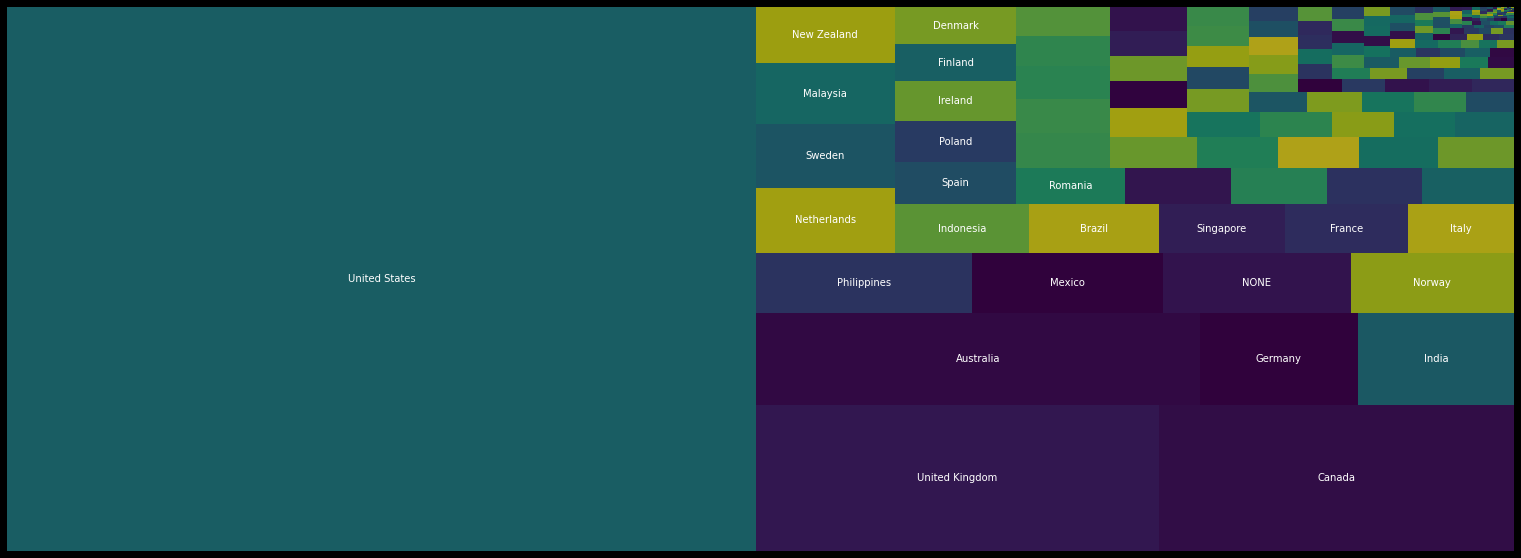

In [129]:
plt.figure(figsize=(27, 10) )

squarify.plot(
              sizes= Countries_groups_counts_descending['count'],
              label= Countries_groups_counts_descending['country'][:25],
              alpha=.7 )
plt.axis('off')
plt.show()

## <a name='10'></a>4.2. Liczba wystąpień poszczególnych odpowiedzi dla każdego zagadnienia

In [130]:
def create_countplot(decoded_question_dict, country_name=False):
  rows = 2
  cols = 5
  question_no = 0

  plt.style.use('dark_background')
  fig = plt.figure(figsize=(27,10))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  if country_name == False:
    Big_five_data = BigFive
    sup_title_end = ' - wszystkie badane kraje'
  else:
    Big_five_data = BigFive[BigFive['country'].isin([country_name])]
    sup_title_end = f' dla kraju: {country_name}'

  for i in range(1, 11):   
    fig.add_subplot(rows, cols, i)

    question = [quest for quest in decoded_question_dict.keys()][question_no]
    decoded_question = [quest for quest in decoded_question_dict.values()][question_no]
    
    if question[:3] == 'EXT':
      trait = 'Extraversion'
    elif question[:3] == 'EST':
      trait = 'Neuroticism'
    elif question[:3] == 'AGR':
      trait = 'Agreeableness'      
    elif question[:3] == 'CSN':
      trait = 'Conscientiousness'
    elif question[:3] == 'OPN':
      trait = 'Openness'

    g = sns.countplot(data=Big_five_data, x = question)
    fig.suptitle(f'Zestaw pytań z grupy {question[:3]}: {trait}'+sup_title_end, fontsize=16)
    g.set( xlabel=f'{question}: {decoded_question}')
    g.grid(color = "grey", linewidth = "0.5", linestyle = "-.") 

    question_no += 1

  plt.show()

In [131]:
decoded_EXTquestion_dict = {
                            'EXT1' : "I am the life of the party.",
                            'EXT2' : "I don't talk a lot.",
                            'EXT3' : "I feel comfortable around people.",
                            'EXT4' : "I keep in the background.",
                            'EXT5' : "I start conversations.",
                            'EXT6' : "I have little to say.",
                            'EXT7' : "I talk to a lot of different people at parties.",
                            'EXT8' : "I don't like to draw attention to myself.",
                            'EXT9' : "I don't mind being the center of attention.",
                            'EXT10' : "I am quiet around strangers."
                          }

decoded_ESTquestion_dict = {
                            'EST1' : "I get stressed out easily.",
                            'EST2' : "I am relaxed most of the time.",
                            'EST3' : "I worry about things.",
                            'EST4' : "I seldom feel blue.",
                            'EST5' : "I am easily disturbed.",
                            'EST6' : "I get upset easily.",
                            'EST7' : "I change my mood a lot.",
                            'EST8' : "I have frequent mood swings.",
                            'EST9' : "I get irritated easily.",
                            'EST10' : "I often feel blue."
                          }   
                          
decoded_AGRquestion_dict = {
                            'AGR1' : "I feel little concern for others.",
                            'AGR2' : "I am interested in people.",
                            'AGR3' : "I insult people.",
                            'AGR4' : "I sympathize with others' feelings.",
                            'AGR5' : "I am not interested in other people's problems.",
                            'AGR6' : "I have a soft heart.",
                            'AGR7' : "I am not really interested in others.",
                            'AGR8' : "I take time out for others.",
                            'AGR9' : "I feel others' emotions.",
                            'AGR10' : "I make people feel at ease."
                          }  


decoded_CSNquestion_dict = {
                            'CSN1' : "I am always prepared.",
                            'CSN2' : "I leave my belongings around.",
                            'CSN3' : "I pay attention to details.",
                            'CSN4' : "I make a mess of things.",
                            'CSN5' : "I get chores done right away.",
                            'CSN6' : "I often forget to put things back in their proper place.",
                            'CSN7' : "I like order.",
                            'CSN8' : "I shirk my duties.",
                            'CSN9' : "I follow a schedule.",
                            'CSN10' : "I am exacting in my work."
                          }                       

decoded_OPNquestion_dict = {
                            'OPN1' : "I have a rich vocabulary.",
                            'OPN2' : "I have difficulty understanding abstract ideas.",
                            'OPN3' : "I have a vivid imagination.",
                            'OPN4' : "I am not interested in abstract ideas.",
                            'OPN5' : "I have excellent ideas.",
                            'OPN6' : "I do not have a good imagination.",
                            'OPN7' : "I am quick to understand things.",
                            'OPN8' : "I use difficult words.",
                            'OPN9' : "I spend time reflecting on things.",
                            'OPN10' : "I am full of ideas."
                          }

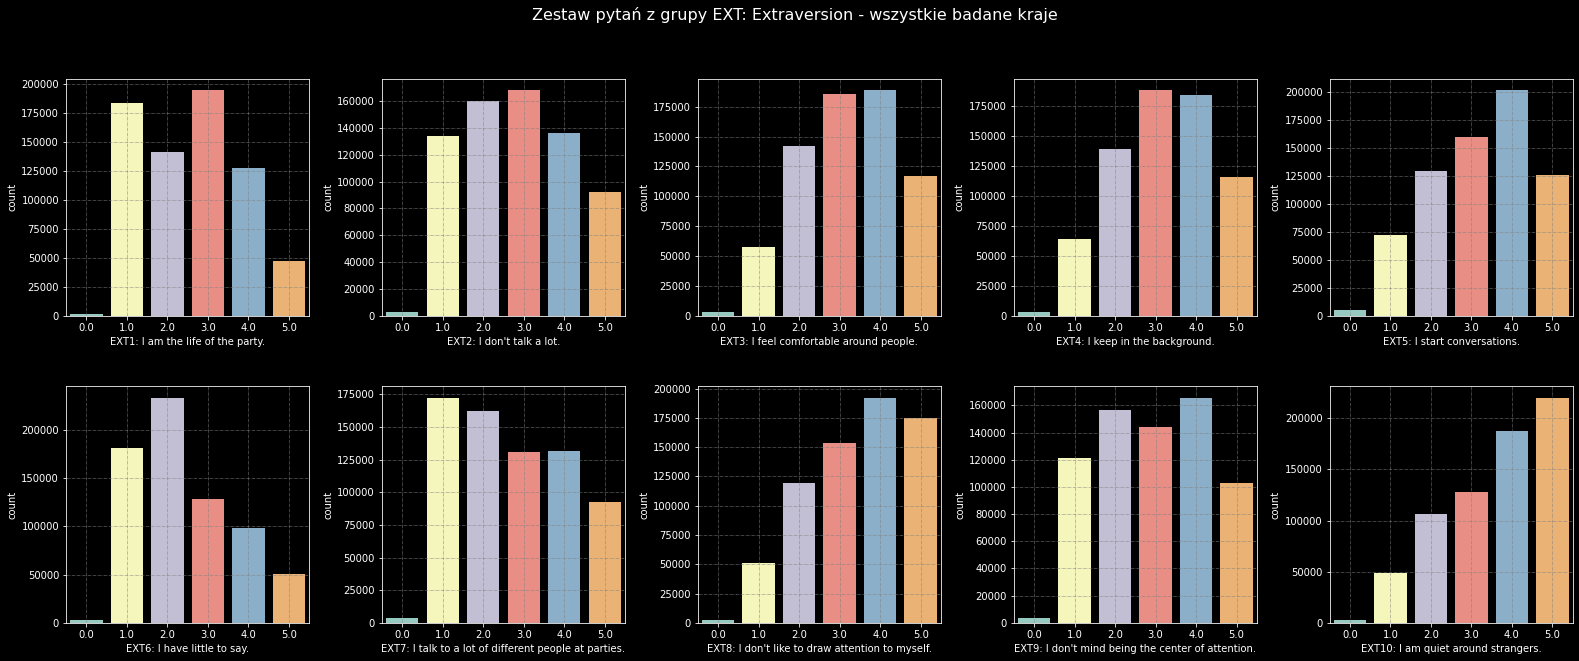

In [132]:
create_countplot(decoded_EXTquestion_dict)

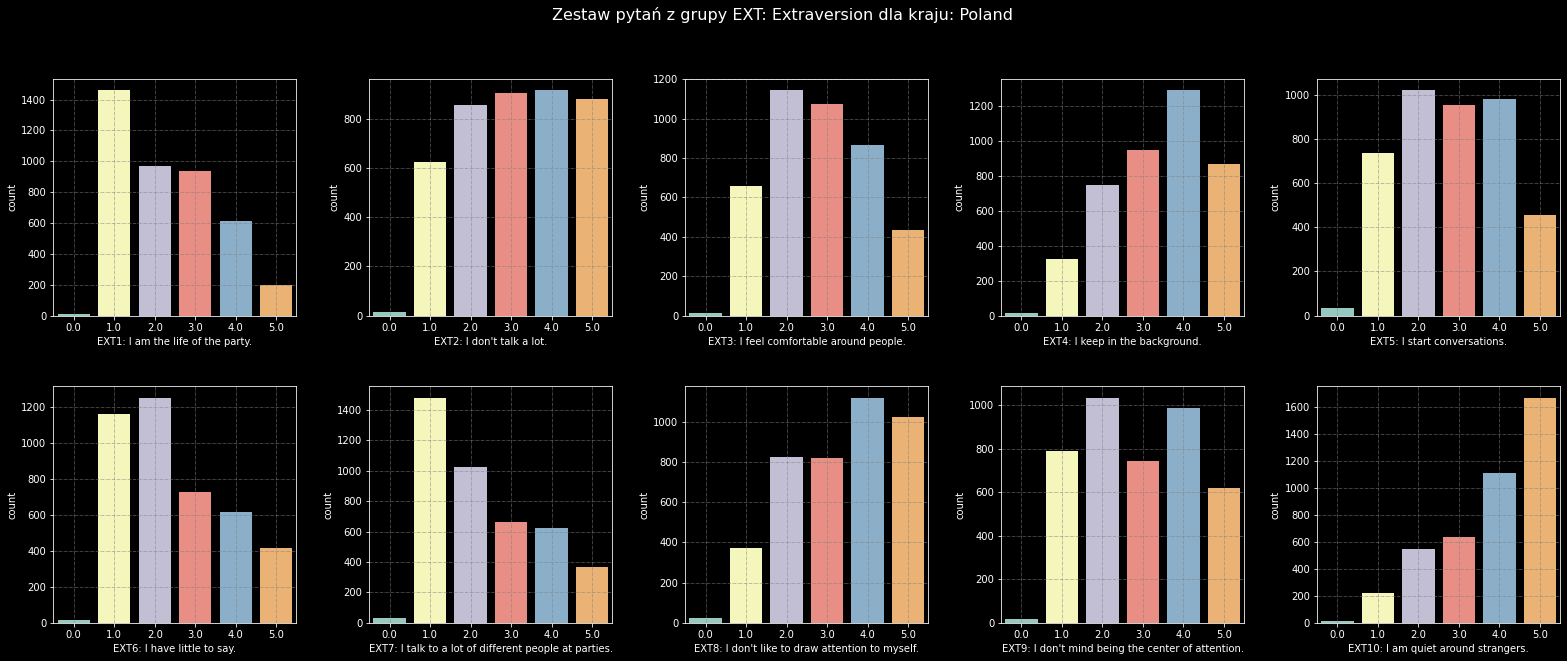

In [133]:
create_countplot(decoded_EXTquestion_dict, country_name='Poland')

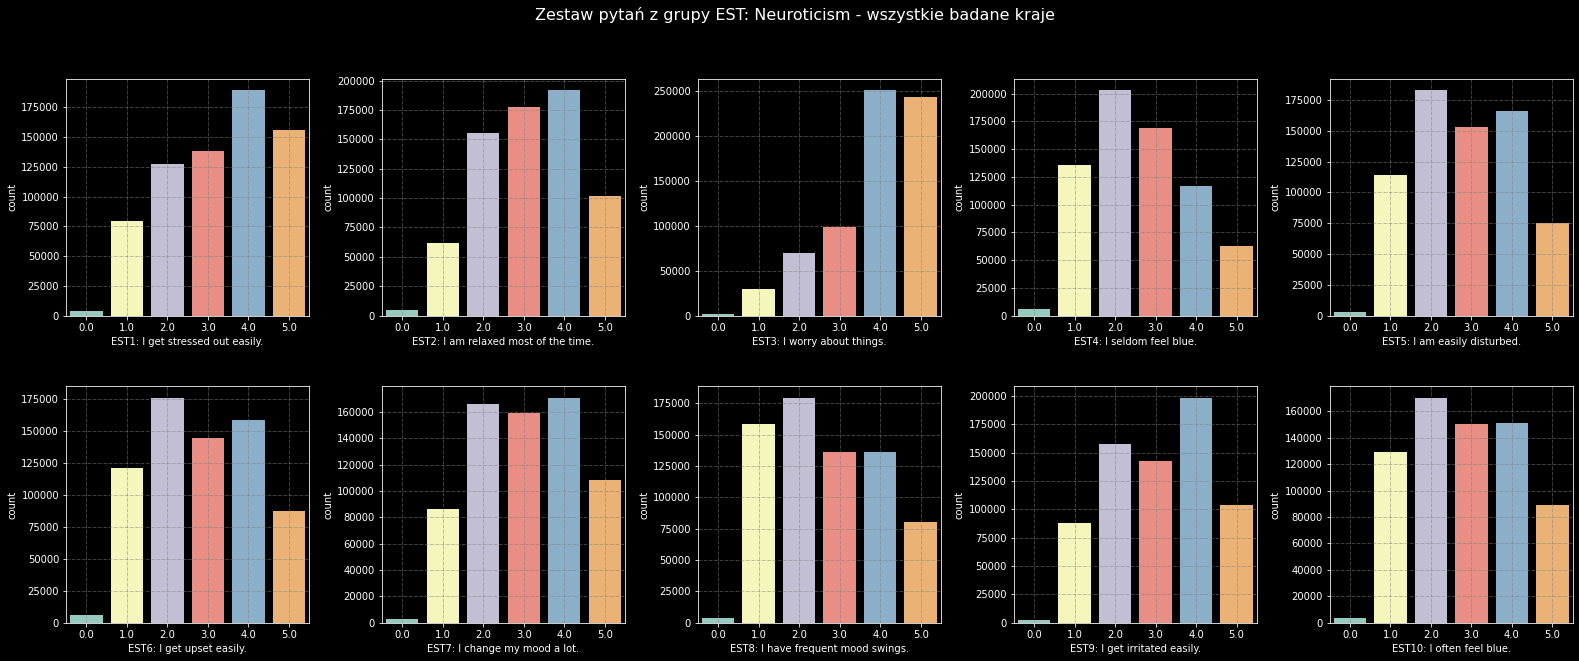

In [134]:
create_countplot(decoded_ESTquestion_dict)

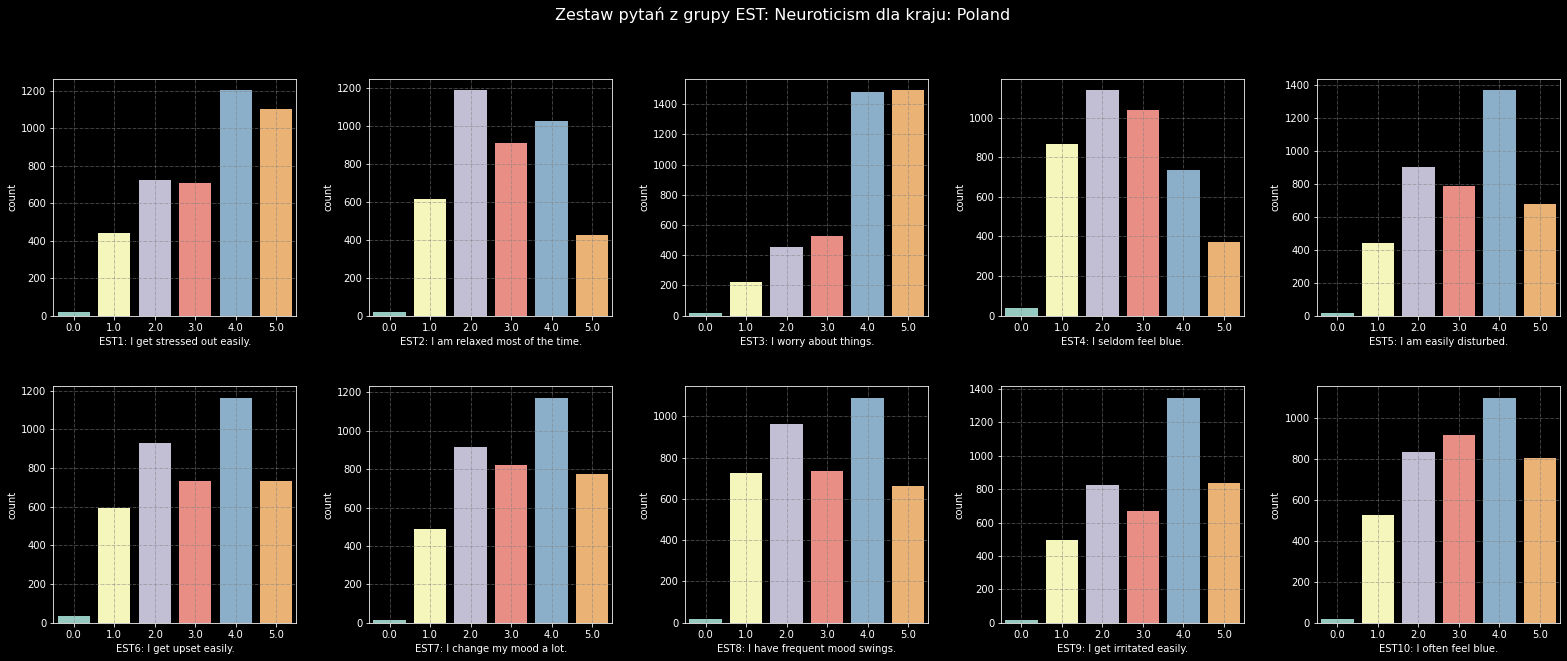

In [135]:
create_countplot(decoded_ESTquestion_dict, country_name='Poland')

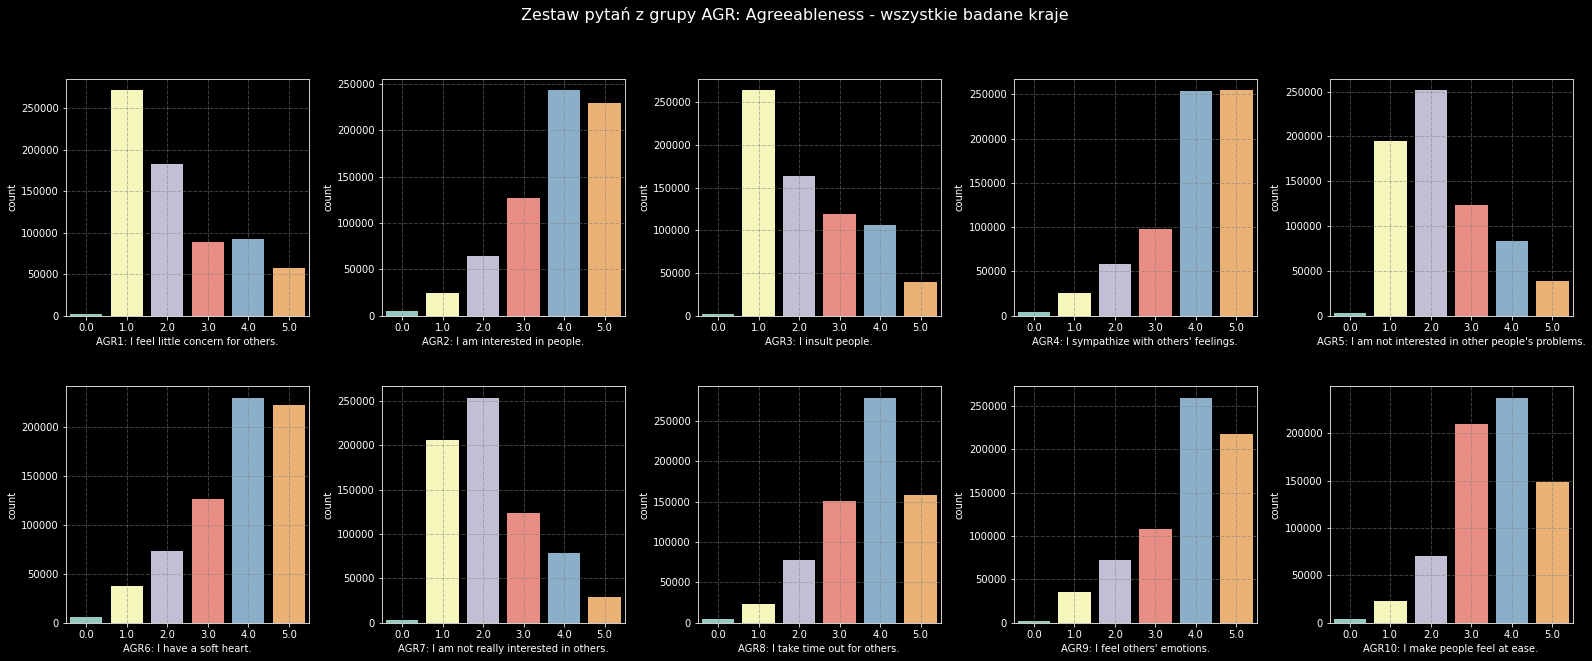

In [136]:
create_countplot(decoded_AGRquestion_dict)

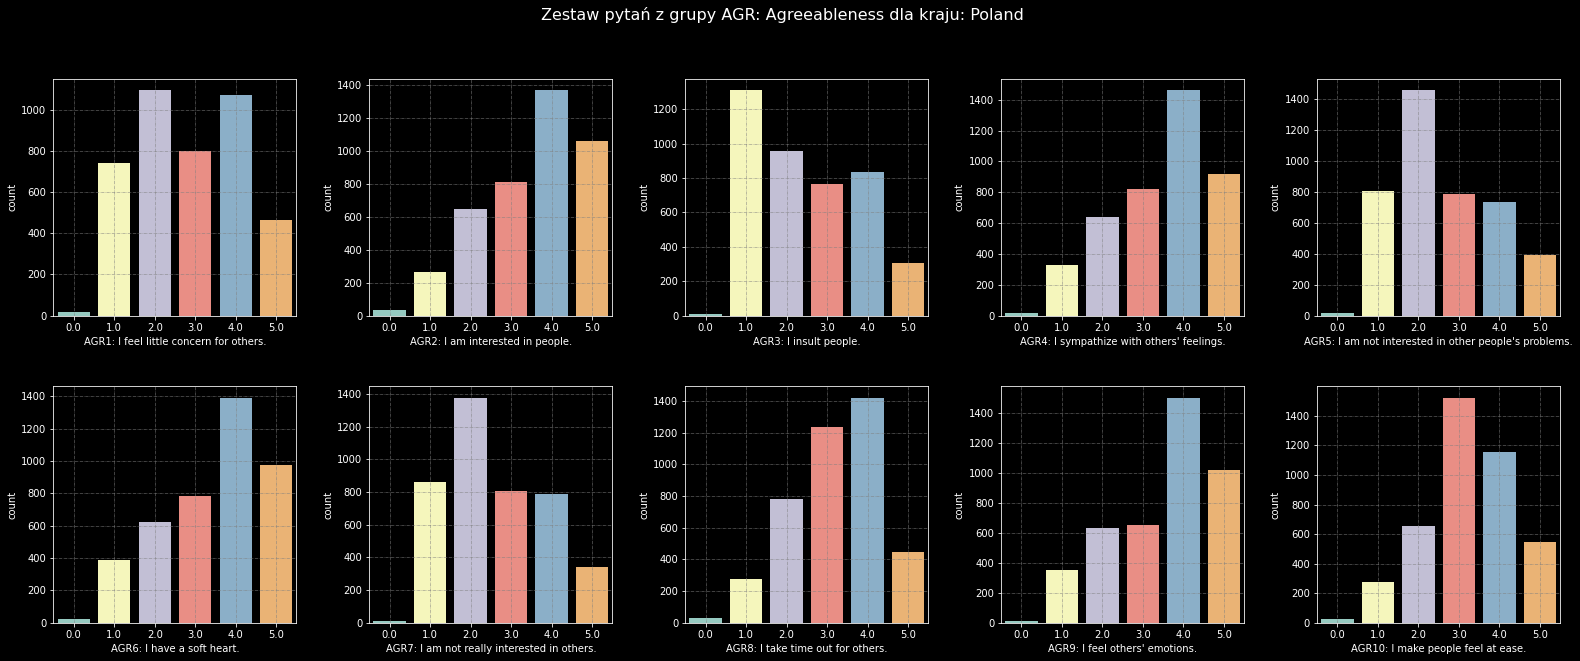

In [137]:
create_countplot(decoded_AGRquestion_dict, country_name='Poland')

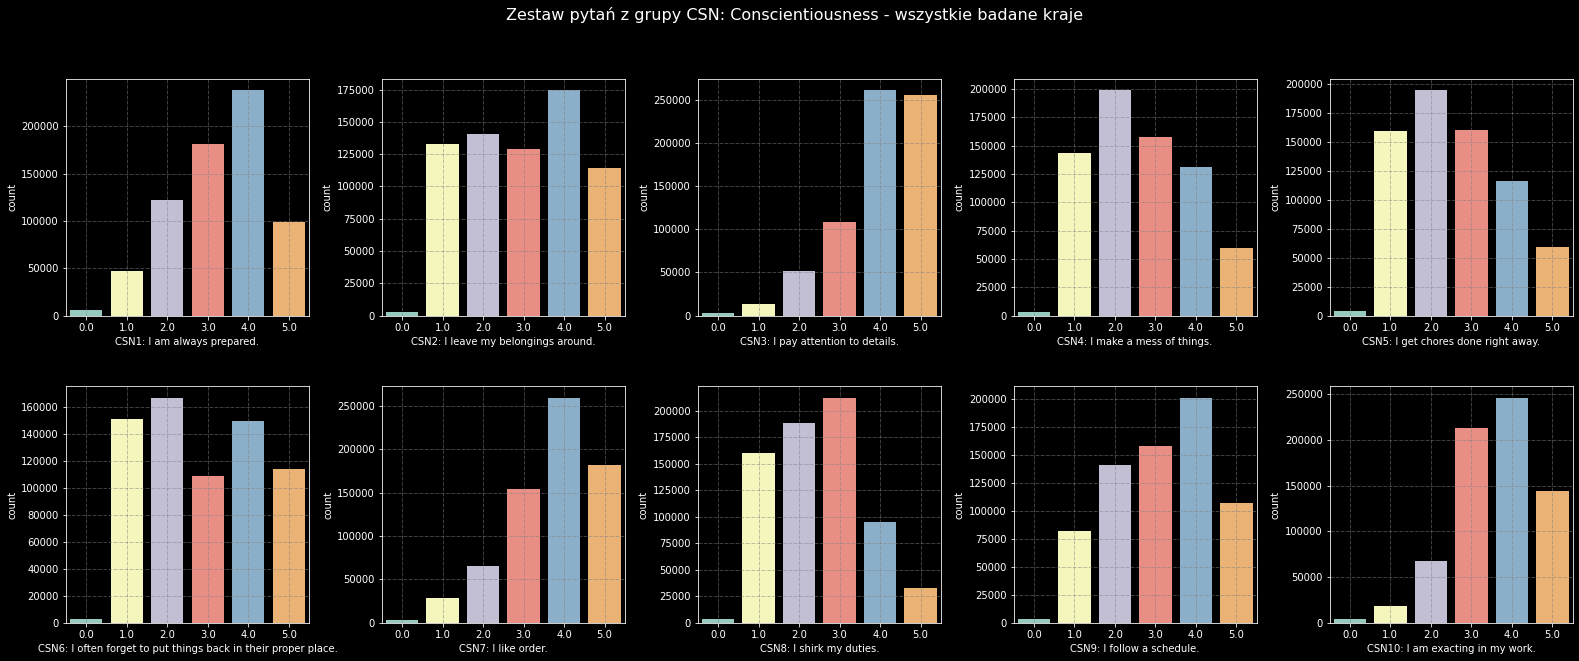

In [138]:
create_countplot(decoded_CSNquestion_dict)

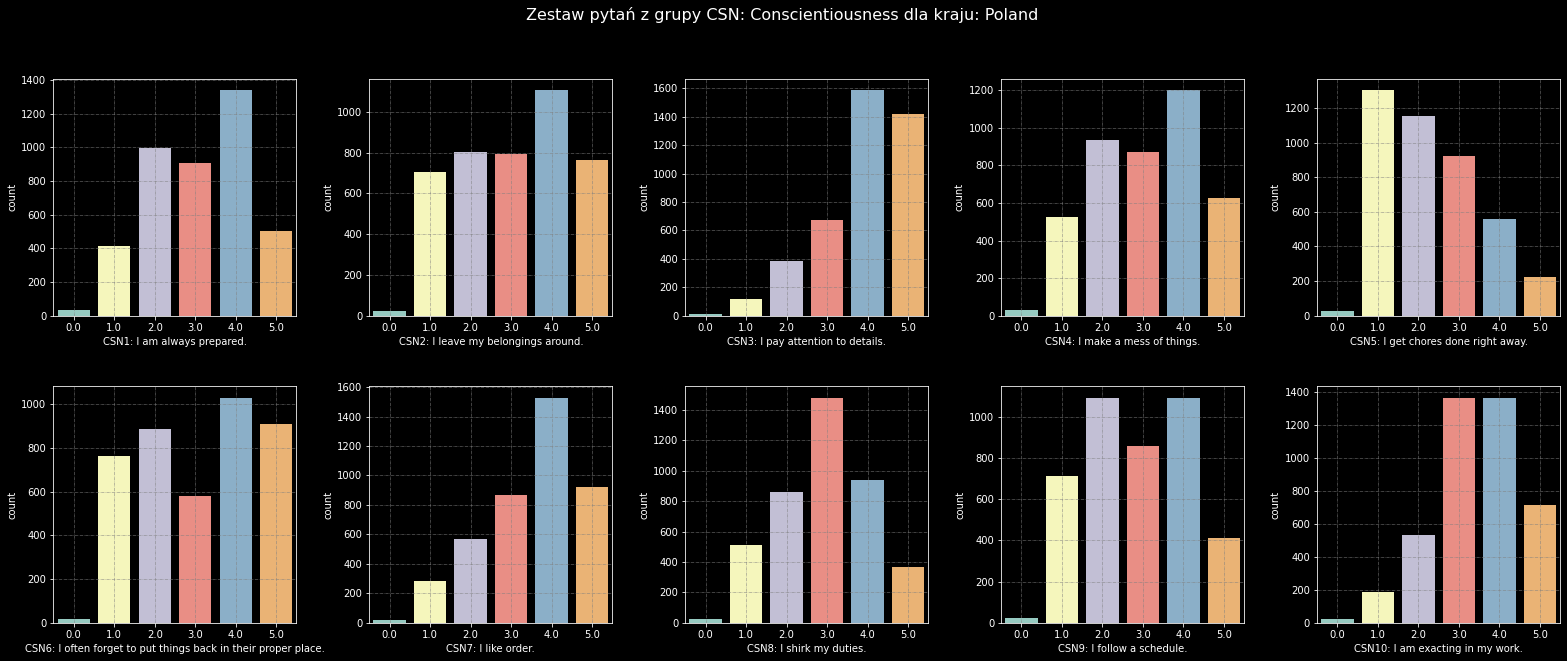

In [139]:
create_countplot(decoded_CSNquestion_dict, country_name='Poland')

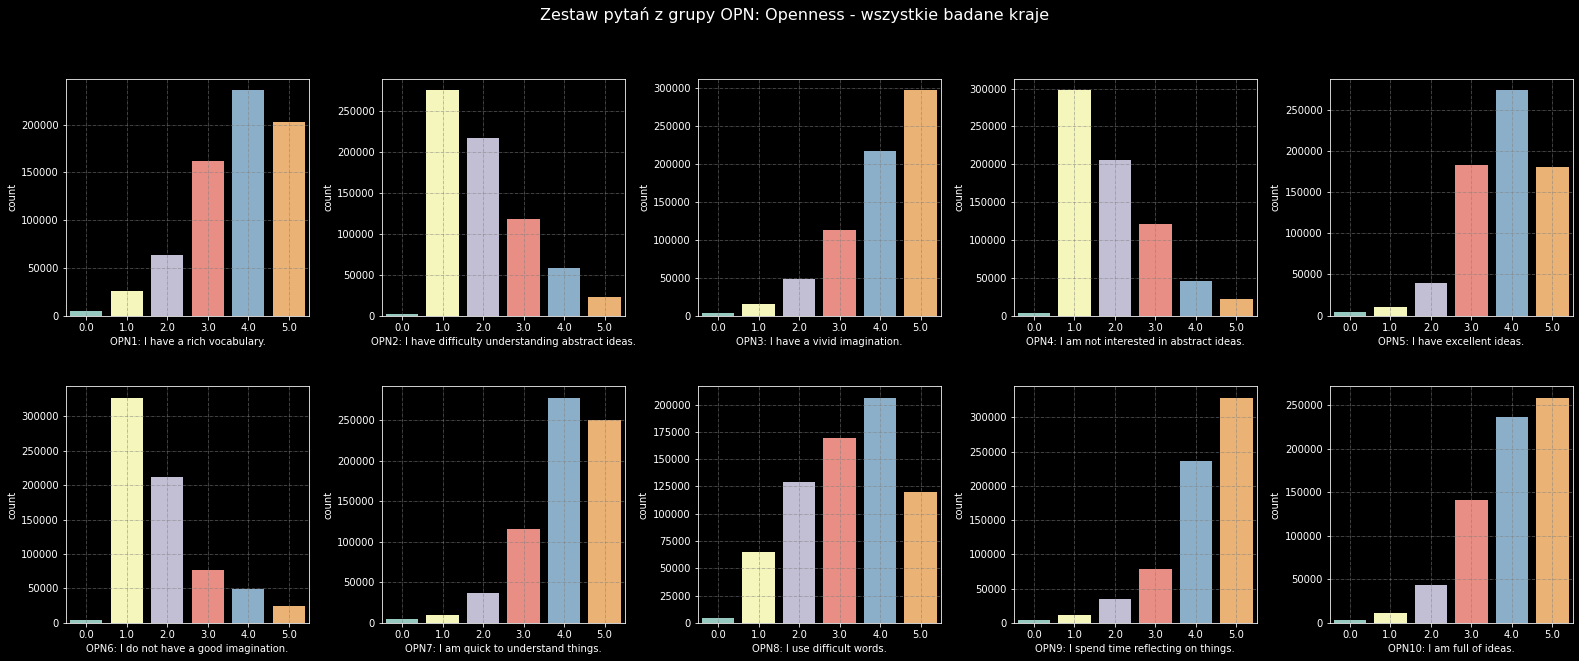

In [140]:
create_countplot(decoded_OPNquestion_dict)

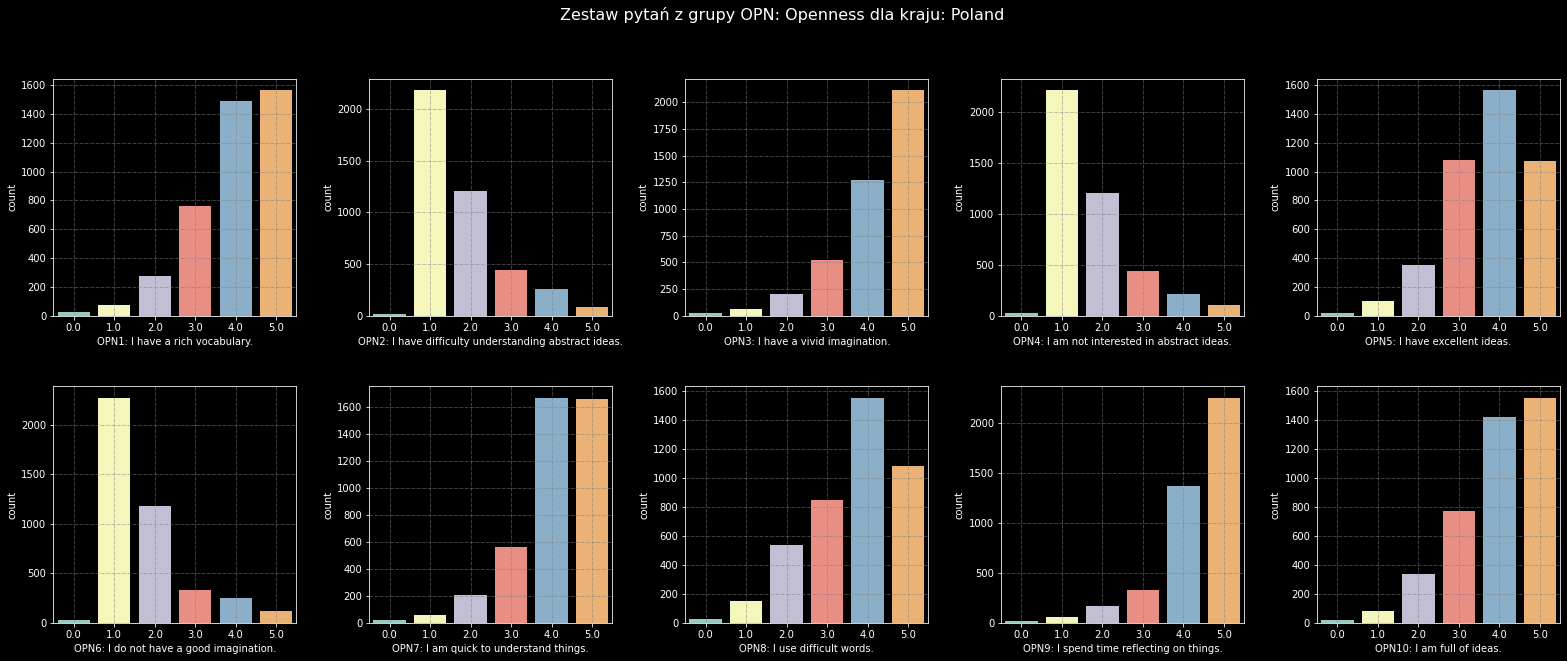

In [141]:
create_countplot(decoded_OPNquestion_dict, country_name='Poland')

## <a name='11'></a>4.3. Analiza korelacji w zbiorze poszczególnych cech



##### Factor I - Extraversion ( **EXT** )
##### Factor II - Agreeableness ( **AGR** )
##### Factor III - Conscientiousness ( **CSN** )
##### Factor IV - Emotional Stability (Neuroticism) ( **EST** )
##### Factor V - Intellect or Imagination (Openness) ( **OPN** )





### <a name='12'></a>4.3.1. Opis i klasyfikacja oznaczeń


|Oznaczenie |+ keyed|Oznaczenie | – keyed |  
|------- |------- |:---- |-------          |
|**EXT1** |	Am the life of the party. |**EXT2**| Don't talk a lot.                 |
|**EXT3** |	Feel comfortable around people. |**EXT4** | Keep in the background.             |
|**EXT5** |	Start conversations.|**EXT6** |Have little to say.                     |
|**EXT7** |	Talk to a lot of different people at parties.   |**EXT8** | 	Don't like to draw attention to myself. |
|**EXT9** |	Don't mind being the center of attention.   |**EXT10** |	Am quiet around strangers.     |
|||
|||
|**Oznaczenie** |**+ keyed**|**Oznaczenie** | **– keyed** | 
|**AGR2**| I am interested in people. |**AGR1** |I feel little concern for others.               |
|**AGR4** | I sympathize with others' feelings.            |**AGR3** |	I insult people |
|**AGR6** |I have a soft heart.|**AGR5** |	I am not interested in other people's problems.|
|**AGR8** | I take time out for others.|**AGR7** |	I am not really interested in others.   |
|**AGR9** |I feel others' emotions.|
|**AGR10** |	I make people feel at ease.|
|||
|||
|**Oznaczenie** |**+ keyed**|**Oznaczenie** | **– keyed** |
|**CSN1**|	Am always prepared. |**CSN2**| Leave my belongings around.|
|**CSN3**|	Pay attention to details.  |**CSN4**|Make a mess of things.|
|**CSN5**|	Get chores done right away.   |**CSN6**|Often forget to put things back in their proper place.                 |
|**CSN7**|	Like order.  |**CSN8**| Shirk my duties.   |
|**CSN9**|	Follow a schedule. | 	    |
|**CSN10**| Am exacting in my work. |  | 
|||
|||
|**Oznaczenie** |**+ keyed**|**Oznaczenie** | **– keyed** |
|**EST2**|I am relaxed most of the time. |**EST1**|I get stressed out easily.|
|**EST4**|I seldom feel blue.|**EST3**|I worry about things.|
|||**EST5**|I am easily disturbed.|
|||**EST6**|I get upset easily.|
|||**EST7**|I change my mood a lot.| 	    
|||**EST8**|I have frequent mood swings.|  
|||**EST9**	|I get irritated easily.|
|||**EST10** |I often feel blue.|
|||
|||
|**Oznaczenie** |**+ keyed**|**Oznaczenie** | **– keyed** |
|**OPN1**|I have a rich vocabulary.|**OPN2**|I have difficulty understanding abstract ideas.|
|**OPN3**|I have a vivid imagination.|**OPN4**|I am not interested in abstract ideas..|
|**OPN5**|I have excellent ideas.|**OPN6**|I do not have a good imagination.|
|**OPN7**|I am quick to understand things.|||
|**OPN8**|I use difficult words.||| 	    
|**OPN9**|I spend time reflecting on things.|||  
|**OPN10**	|I am full of ideas.|||



### <a name='13'></a>4.3.2. Przygotowanie danych

In [149]:
BigFive.columns[-6:-5]

Index(['country'], dtype='object')

In [142]:
BigFive.columns[-1:]

Index(['Openness'], dtype='object')

In [150]:
def make_factor_df(Factor_columns_names):

  country_col = BigFive.columns[-6:-5]

  Factor_col_names_with_info = Factor_columns_names.append(country_col)
  Factor_df = BigFive[ Factor_col_names_with_info]
  Factor_df.set_index(['country'], inplace=True)
  Factor_df.sort_index(inplace=True)

  return Factor_df

In [151]:
Factor_I_Extraversion_col_names =  BigFive.columns[:10]
Factor_II_Agreeableness_col_names =  BigFive.columns[20:30]
Factor_III_Conscientiousness_col_names =  BigFive.columns[30:40]
Factor_IV_EmotionalStability_col_names =  BigFive.columns[10:20]
Factor_V_Openness_col_names =  BigFive.columns[40:50]


print( Factor_I_Extraversion_col_names        )
print( Factor_II_Agreeableness_col_names      )
print( Factor_III_Conscientiousness_col_names )
print( Factor_IV_EmotionalStability_col_names )
print( Factor_V_Openness_col_names            )

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10'],
      dtype='object')
Index(['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9',
       'AGR10'],
      dtype='object')
Index(['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9',
       'CSN10'],
      dtype='object')
Index(['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9',
       'EST10'],
      dtype='object')
Index(['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9',
       'OPN10'],
      dtype='object')


In [152]:
Factor_I_Extraversion_df        = make_factor_df(Factor_I_Extraversion_col_names)
Factor_II_Agreeableness_df      = make_factor_df(Factor_II_Agreeableness_col_names)
Factor_III_Conscientiousness_df = make_factor_df(Factor_III_Conscientiousness_col_names)
Factor_IV_EmotionalStability_df = make_factor_df(Factor_IV_EmotionalStability_col_names)
Factor_V_Openness_df            = make_factor_df(Factor_V_Openness_col_names)

Factor_I_Extraversion_df
# Factor_II_Agreeableness_df
# Factor_III_Conscientiousness_df
# Factor_IV_EmotionalStability_df
# Factor_V_Openness_df

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10
country                                                                   
Afghanistan     3.0   2.0   4.0   3.0   4.0   2.0   1.0   4.0   5.0    5.0
Afghanistan     1.0   2.0   5.0   2.0   5.0   1.0   5.0   4.0   4.0    3.0
Afghanistan     3.0   3.0   4.0   4.0   4.0   3.0   4.0   3.0   4.0    4.0
Afghanistan     5.0   3.0   4.0   5.0   4.0   2.0   5.0   4.0   3.0    3.0
Afghanistan     4.0   1.0   4.0   3.0   4.0   4.0   1.0   2.0   5.0    5.0
...             ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
Åland Islands   1.0   3.0   2.0   4.0   2.0   2.0   2.0   3.0   3.0    5.0
Åland Islands   4.0   1.0   5.0   1.0   5.0   1.0   4.0   1.0   5.0    3.0
Åland Islands   2.0   4.0   2.0   5.0   2.0   1.0   1.0   5.0   4.0    4.0
Åland Islands   3.0   2.0   2.0   3.0   3.0   4.0   2.0   4.0   1.0    4.0
Åland Islands   1.0   3.0   4.0   5.0   1.0   4.0   1.0   3.0   5.0    4.0

[693694 rows x 10 columns]

In [153]:
Factor_I_Extraversion_names_list = ['I am the life\nof the party. (EXT1)',
                                    "I don't talk a lot. (EXT2)",
                                    'I feel comfortable\naround people. (EXT3)',
                                    'I keep\nin the background. (EXT4)',
                                    'I start conversations. (EXT5)',
                                    'I have little\nto say. (EXT6)',
                                    'I talk to a lot of different\npeople at parties. (EXT7)',
                                    "I don't like to\ndraw attention to myself. (EXT8)",
                                    "I don't mind\nbeing the center of attention. (EXT9)",
                                    'I am quiet\naround strangers. (EXT10)']  

Factor_II_Agreeableness_names_list = [
                                    "I feel little concern\nfor others. (AGR1)",
                                    "I am interested\nin people. (AGR2)",
                                    "I insult people. (AGR3)", 
                                    "I sympathize with\nothers' feelings. (AGR4)",
                                    "I am not interested in\nother people's problems. (AGR5)", 
                                    "I have\na soft heart. (AGR6)", 
                                    "I am not really\ninterested in others. (AGR7)",
                                    "I take time out\nfor others. (AGR8)",
                                    "I feel others'\nemotions. (AGR9)",
                                    "I make people\nfeel at ease. (AGR10)"
                                    ]                              

Factor_III_Conscientiousness_names_list = [
                                    "I am always\nprepared. (CSN1)",
                                    "I leave my\nbelongings around. (CSN2)",
                                    "I pay attention\nto details. (CSN3)", 
                                    "I make a mess\nof things. (CSN4)",
                                    "I get chores done\nright away. (CSN5)", 
                                    "I often forget to put\nthings back\nin their proper place. (CSN6)", 
                                    "I like order. (CSN7)",
                                    "I shirk\nmy duties. (CSN8)",
                                    "I follow\na schedule. (CSN9)",
                                    "I am exacting\nin my work. (CSN10)"
                                    ]

Factor_IV_EmotionalStability_names_list = [
                                    "I get stressed\nout easily. (EST1)",
                                    "I am relaxed\nmost of the time. (EST2)",
                                    "I worry\nabout things. (EST3)", 
                                    "I seldom\nfeel blue. (EST4)",
                                    "I am easily\ndisturbed. (EST5)", 
                                    "I get upset\neasily. (EST6)", 
                                    "I change my mood\na lot. (EST7)",
                                    "I have frequent\nmood swings. (EST8)",
                                    "I get irritated\neasily. (EST9)",
                                    "I often\nfeel blue. (EST10)"
                                    ]

Factor_V_Openness_names_list = [
                                    "I have a rich\nvocabulary. (OPN1)",
                                    "I have difficulty understanding\nabstract ideas. (OPN2)",
                                    "I have a vivid\nimagination. (OPN3)", 
                                    "I am not interested in\nabstract ideas. (OPN4)",
                                    "I have excellent\nideas. (OPN5)", 
                                    "I do not have a good\nimagination. (OPN6)", 
                                    "I am quick to\nunderstand things. (OPN7)",
                                    "I use difficult\nwords. (OPN8)",
                                    "I spend time reflecting on\nthings. (OPN9)",
                                    "I am full of\nideas. (OPN10)"
                                    ]

In [154]:
Factors_df_dict = {
                      'Extraversion'        : ( Factor_I_Extraversion_df,         Factor_I_Extraversion_names_list        ),
                      'Agreeableness'       : ( Factor_II_Agreeableness_df,       Factor_II_Agreeableness_names_list      ),
                      'Conscientiousness'   : ( Factor_III_Conscientiousness_df,  Factor_III_Conscientiousness_names_list ),
                      'Emotional Stability' : ( Factor_IV_EmotionalStability_df,  Factor_IV_EmotionalStability_names_list ),
                      'Openness'            : ( Factor_V_Openness_df,             Factor_V_Openness_names_list            )
                  }

### <a name='14'></a>4.3.3. Mapy korelacji poszczególnych cech

In [155]:
def make_corr_map(factor_dict):
  factorNo = 0
  cols = 2
  rows = 3
  set_cbar = False

  fig = plt.figure(figsize=(23,23))
  fig.subplots_adjust(hspace=0.5, wspace=0.35 )

  for i in range(1, 6):
        fig.add_subplot(rows, cols, i) 
        factor_df      = [ val for val in factor_dict.values() ][factorNo][0]
        factor_question_list = [ val for val in factor_dict.values() ][factorNo][1]
        factor_name = [ key for key in factor_dict.keys()   ][factorNo]
        
        factor_corr = factor_df.corr()

        if i == 5:
          set_cbar=True

        g = sns.heatmap(factor_corr, xticklabels=factor_question_list, yticklabels=factor_question_list, cbar=set_cbar, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
        g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
        plt.title(factor_name, fontsize=18 )
        
     
        factorNo += 1

  return plt.show()

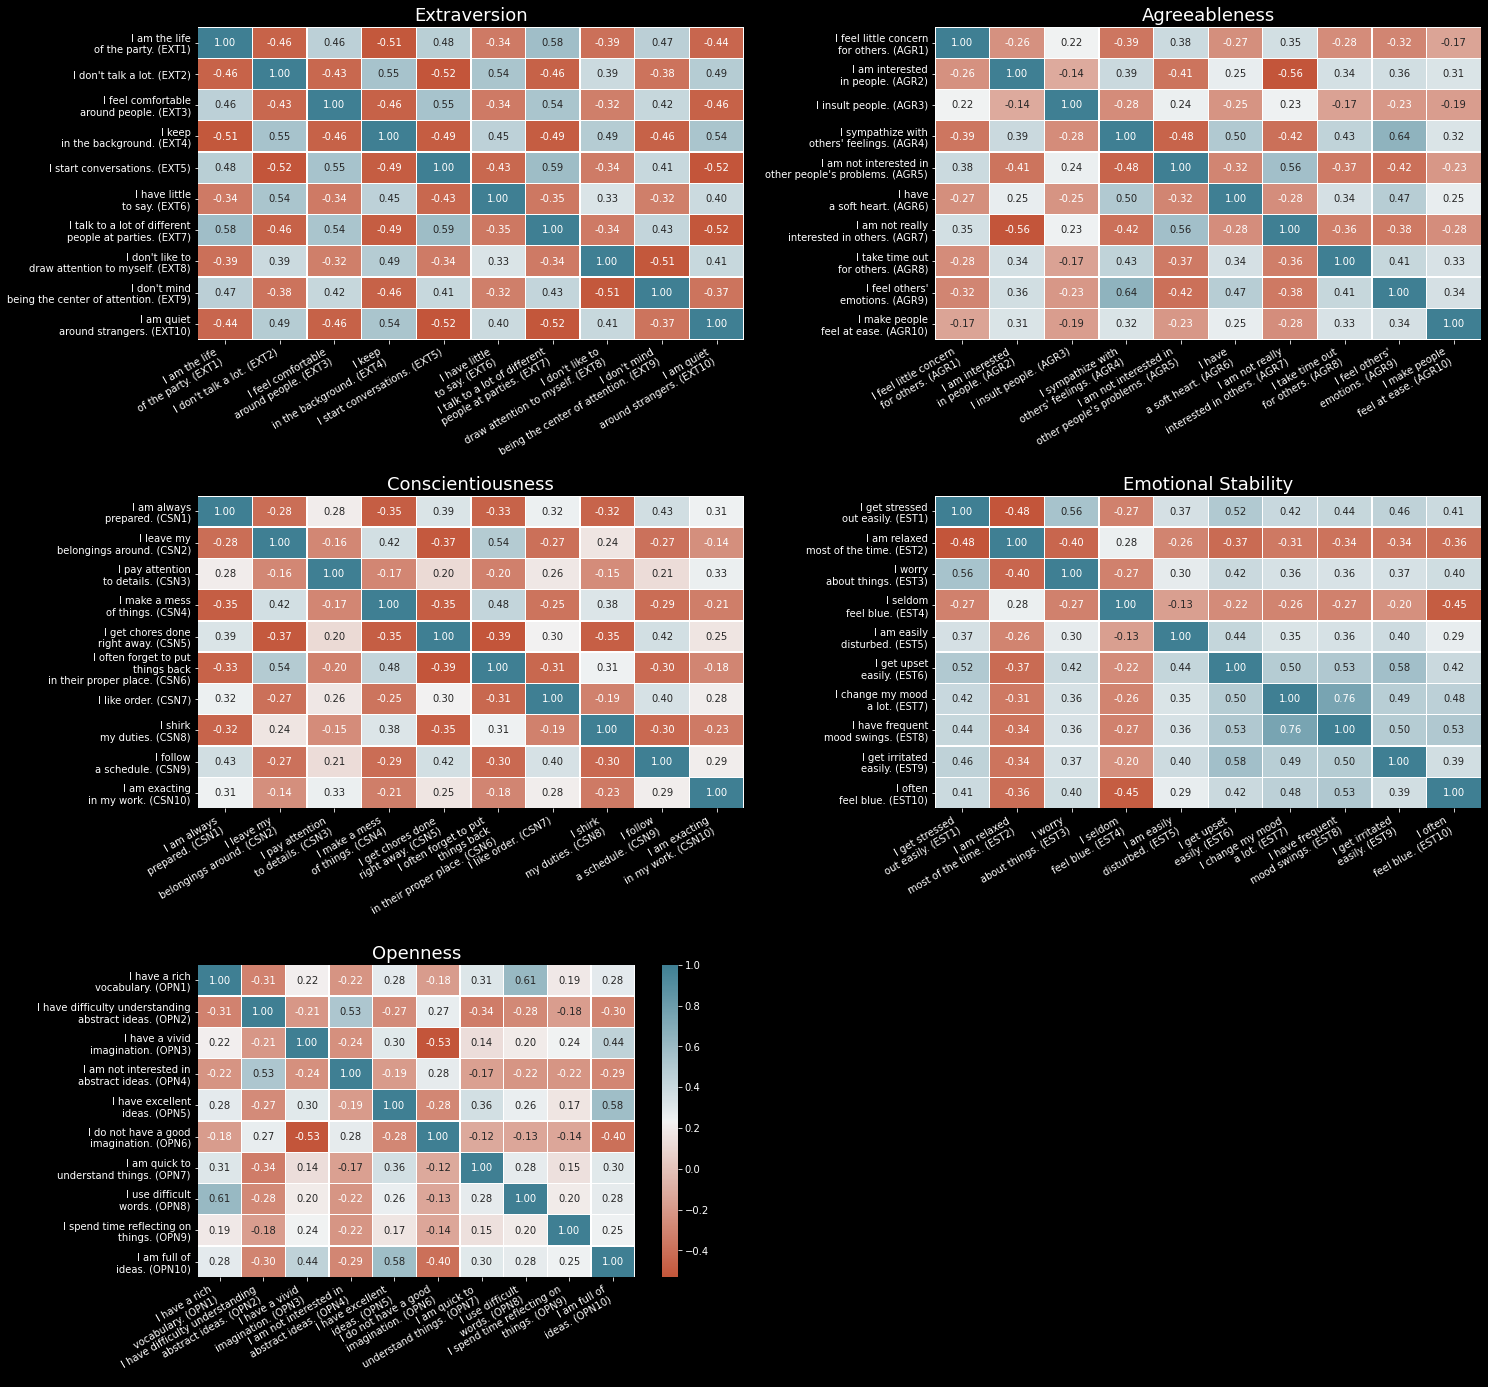

In [156]:
make_corr_map(Factors_df_dict)

### Próba podsumowania korelacji.

Praktycznie na żadnej mapie nie widać korelacji dodatniej lub ujemnej bliskiej wartości 0.9 lub chociaż 0.8.

## **korelacja Extraversion**
Twierdzenie '**I am the life of the party. (EXT1)**' jest najbardziej skorelowane dodatnio ze stwierdzeniem '**I talk to a lot of diffrent people at parties EXT7**'.
Największa korelacja ujemna zachodzi między powyższym twierdzeniem **EXT1** a ( **I keep in the background (EXT4)**).

W przypadku twierdzenia '**I don't talk a lot (EXT2)**' widać wysoką korelację doatnią z dwoma zdaniami. Z '**I keep in the background. (EXT4**)'. oraz z '**I have little to say. (EXT6)**'.
Dla **EXT2** największa ujemna korelacj jest w stosunku do:
1. '**I start conversations. EXT5**',
2. '**I am the life of the party. EXT1**',
3. '**I talk to a lot of different people at parties. EXT7**'

Twierdzenie '**I feel comfortable around people. EXT3**'. najbardziej w sposób dodatni skorelowane jest z:
1. '**I start conversations. EXT5**',
2. '**I talk to a lot of different people at parties. EXT7**'
Największą ujemną korelację można zauważyć ze zdaniami:
1. '**keep in the background. EXT4**'
2. '**I am quiet around strangers. EXT10**'

Wyżej wspomniane już '**I keep in the background. (EXT4**)' oprócz wysokiej korelacji dodatniej z **EXT2**, posiada też wysoką zależność dodatnią w stosunku do '**I am quiet around strangers. EXT10**'.  itd.

Podsumowując, w przypadku '**I talk to a lot of different people at parties. EXT7**' można zauważyć najwięcej wysokich dodatnich korelacji, powyżej wartości 0.5.
Występują 3 takie zależności z: **EXT1**, **EXT3** i **EXT5**.

Najwięcej korelacji ujemnych można znaleźć dla zdania '**I am quiet around strangers. EXT10**'.
Wartość korelacji z poniższym zdaniami wynosi -0.52.
1. '**I start conversations. EXT5**',
2. '**I talk to a lot of different people at parties. EXT7**'.
Dodatkowo '**I start conversations. EXT5**' posiada także wysoką ujemną korelację z '**I don't talk a lot (EXT2)**' na poziomie -0.52.



---

## **korelacja Agreeableness**

Najwięszka dodatnia korelacja zachodzi pomiędzy
'**I sympathize with others' feelings. AGR4**',
a '**I feel others' emotions. AGR9**' i wynosi 0.64.

Najwięszka ujemna korelacja zachodzi pomiędzy
'**I am interested in people. AGR2**', a '**I am not really interested in others. AGR7**'
i wynosi -0.56.

Wysoka korelacja dodatnia, na poziomie 0.56 zachodzi pomiędzy **I am not really interested in others. AGR7**', a '**I am not interested in other people's problems. AGR5**'.

W przypadku '**I sympathize with others' feelings. AGR4**', występują aż dwie korelacje dodatnie powyżej wartości 0.5, z:
1. '**I feel others' emotions. AGR9**' - 0.64,
2. '**I have a soft heart. AGR6**' - 0.5.

---





In [157]:
Factor_all_names_list = np.append(Factor_I_Extraversion_names_list,
          [Factor_IV_EmotionalStability_names_list, Factor_II_Agreeableness_names_list, Factor_III_Conscientiousness_names_list, Factor_V_Openness_names_list]
          
          )

Factor_all_names_list

array(['I am the life\nof the party. (EXT1)',
       "I don't talk a lot. (EXT2)",
       'I feel comfortable\naround people. (EXT3)',
       'I keep\nin the background. (EXT4)',
       'I start conversations. (EXT5)', 'I have little\nto say. (EXT6)',
       'I talk to a lot of different\npeople at parties. (EXT7)',
       "I don't like to\ndraw attention to myself. (EXT8)",
       "I don't mind\nbeing the center of attention. (EXT9)",
       'I am quiet\naround strangers. (EXT10)',
       'I get stressed\nout easily. (EST1)',
       'I am relaxed\nmost of the time. (EST2)',
       'I worry\nabout things. (EST3)', 'I seldom\nfeel blue. (EST4)',
       'I am easily\ndisturbed. (EST5)', 'I get upset\neasily. (EST6)',
       'I change my mood\na lot. (EST7)',
       'I have frequent\nmood swings. (EST8)',
       'I get irritated\neasily. (EST9)', 'I often\nfeel blue. (EST10)',
       'I feel little concern\nfor others. (AGR1)',
       'I am interested\nin people. (AGR2)', 'I insult people

In [158]:
BigFive.columns[:-8]

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'dateload', 'introelapse',
       'testelapse', 'endelapse'],
      dtype='object')

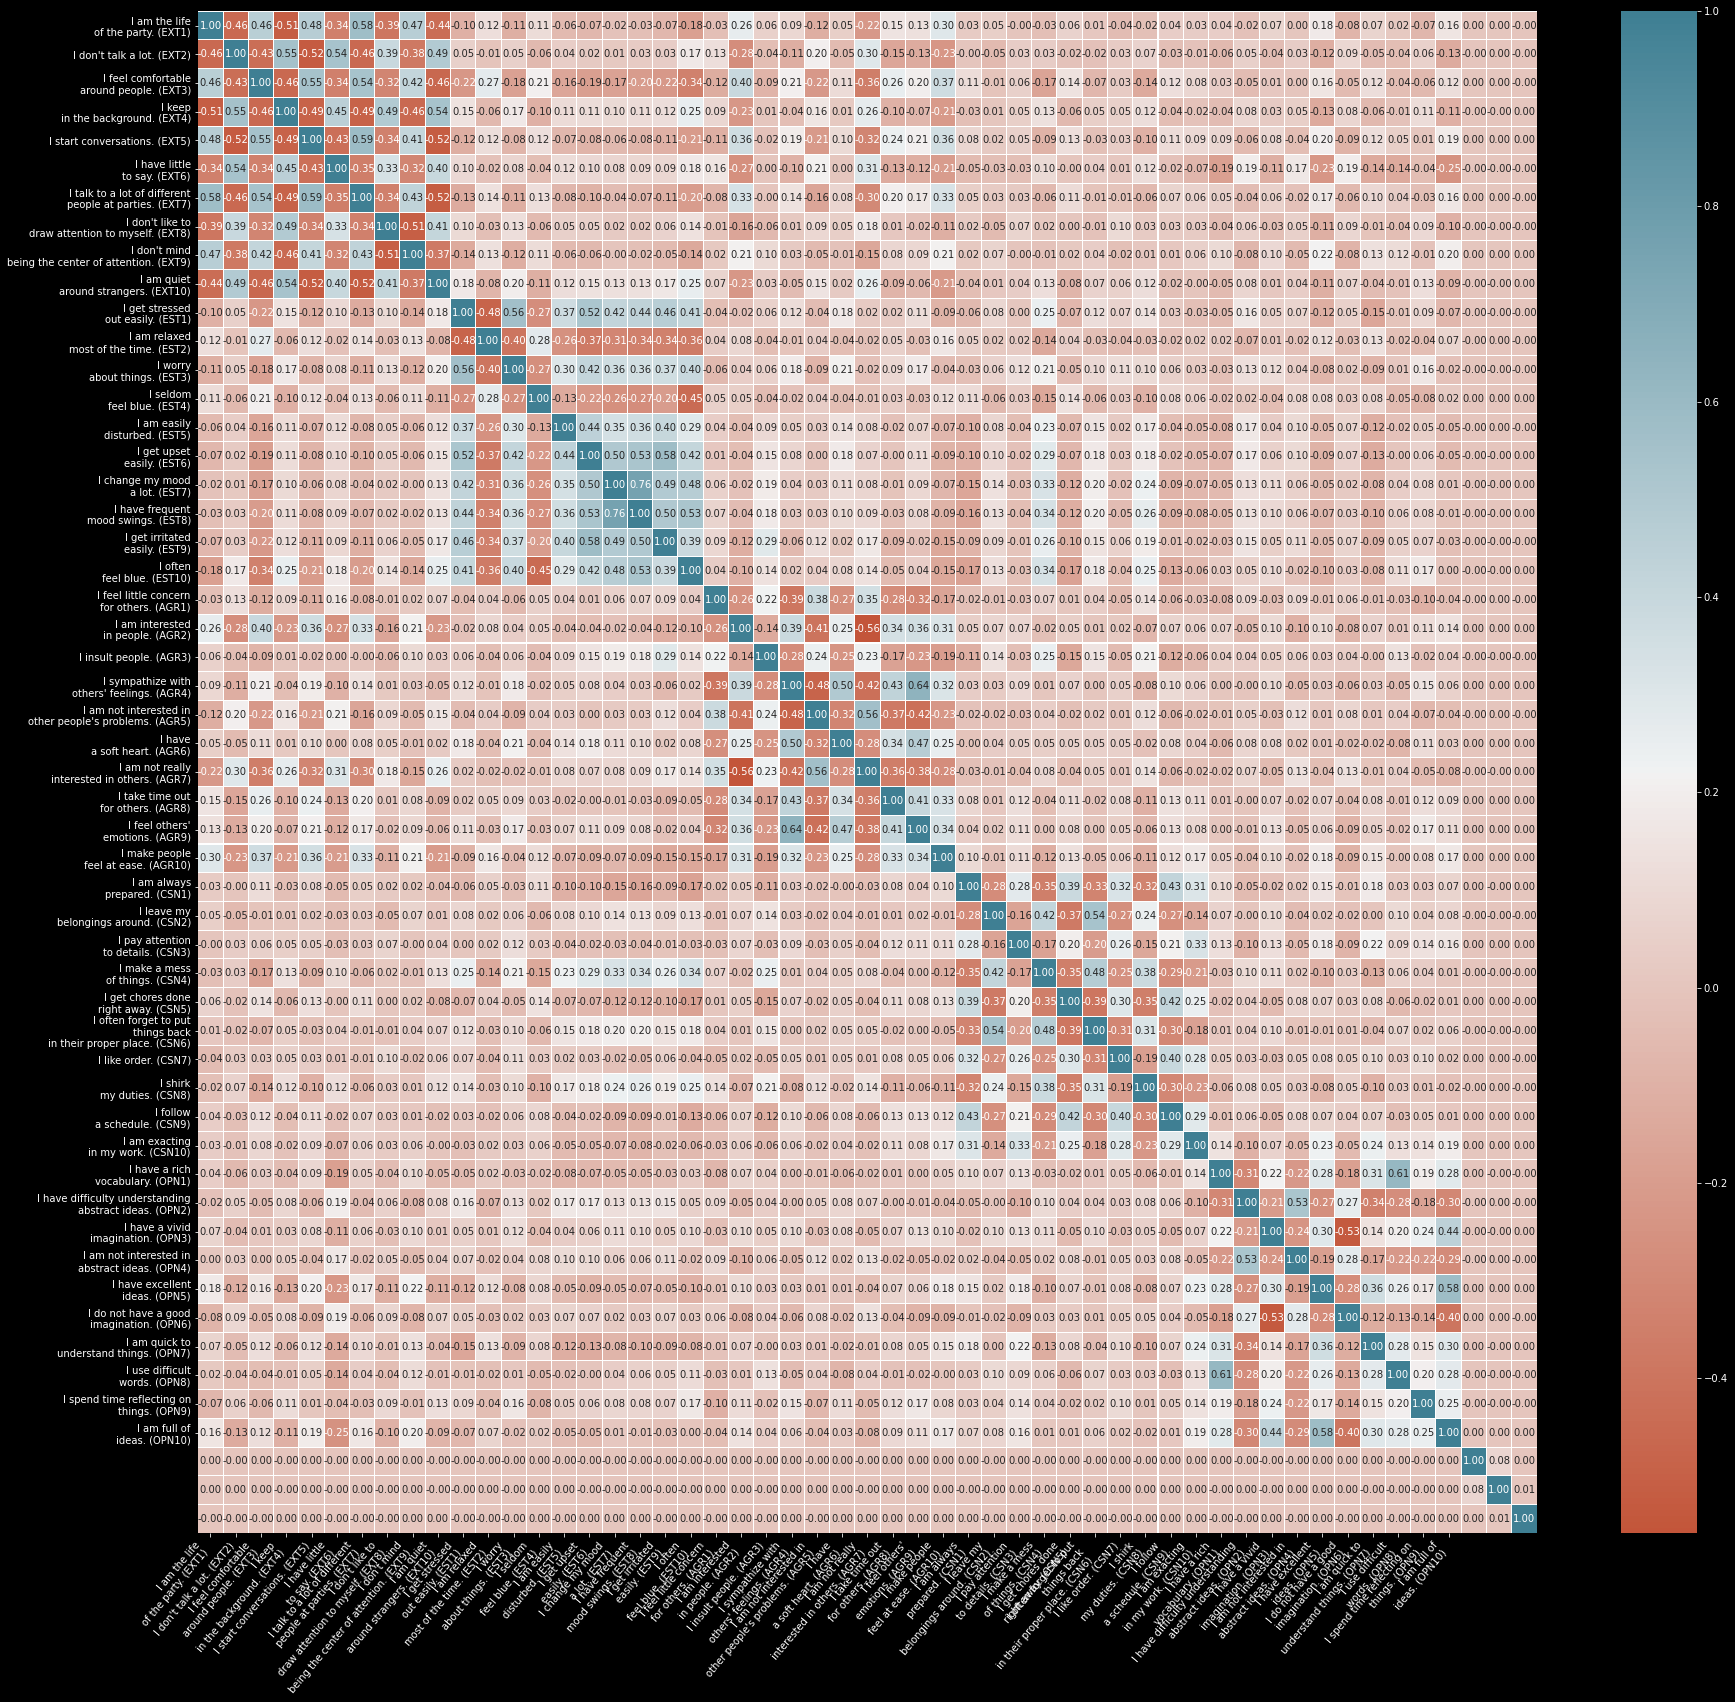

In [159]:
# Warto też zobaczyć, czy przypadkiem nie zachodzą jakieś korelacje pomiędzy różnymi cechami.
allfactor_corr = BigFive[BigFive.columns[:-8]].corr()

fig = plt.figure(figsize=(30,28))

g = sns.heatmap(allfactor_corr, xticklabels=Factor_all_names_list, yticklabels=Factor_all_names_list, cbar=True, annot=True, fmt='.2f', linewidth=.05, cmap=sns.diverging_palette(20, 220, n=256))
g.set_xticklabels( g.get_xticklabels(), rotation=50,  horizontalalignment='right', fontweight='light' )

plt.show()

## <a name='15'></a>4.4 Państwa o najwyższym poziomie Extraversion


|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**EXT1** |	Am the life of the party. |**EXT2**| Don't talk a lot.                 |
|**EXT3** |	Feel comfortable around people. |**EXT4** | Keep in the background.             |
|**EXT5** |	Start conversations.|**EXT6** |Have little to say.                     |
|**EXT7** |	Talk to a lot of different people at parties.   |**EXT8** | 	Don't like to draw attention to myself. |
|**EXT9** |	Don't mind being the center of attention.   |**EXT10** |	Am quiet around strangers.     |


In [160]:
Factor_I_Extraversion_df.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10
country                                                                 
Afghanistan   3.0   2.0   4.0   3.0   4.0   2.0   1.0   4.0   5.0    5.0
Afghanistan   1.0   2.0   5.0   2.0   5.0   1.0   5.0   4.0   4.0    3.0
Afghanistan   3.0   3.0   4.0   4.0   4.0   3.0   4.0   3.0   4.0    4.0
Afghanistan   5.0   3.0   4.0   5.0   4.0   2.0   5.0   4.0   3.0    3.0
Afghanistan   4.0   1.0   4.0   3.0   4.0   4.0   1.0   2.0   5.0    5.0

In [161]:
best_EXT1_filter = Factor_I_Extraversion_df['EXT1'] == 5
best_EXT3_filter = Factor_I_Extraversion_df['EXT3'] == 5
best_EXT5_filter = Factor_I_Extraversion_df['EXT5'] == 5
best_EXT7_filter = Factor_I_Extraversion_df['EXT7'] == 5
best_EXT9_filter = Factor_I_Extraversion_df['EXT9'] == 5


best_AGR2_filter = Factor_II_Agreeableness_df['AGR2'] == 5
best_AGR4_filter = Factor_II_Agreeableness_df['AGR4'] == 5
best_AGR6_filter = Factor_II_Agreeableness_df['AGR6'] == 5
best_AGR8_filter = Factor_II_Agreeableness_df['AGR8'] == 5
best_AGR9_filter = Factor_II_Agreeableness_df['AGR9'] == 5
best_AGR10_filter = Factor_II_Agreeableness_df['AGR10'] == 5

best_EXT_filter = best_EXT1_filter & best_EXT3_filter & best_EXT5_filter & best_EXT7_filter & best_EXT9_filter
best_AGR_filter = best_AGR2_filter & best_AGR4_filter & best_AGR6_filter & best_AGR8_filter & best_AGR9_filter & best_AGR10_filter



Country_with_best_Extraversion = Factor_I_Extraversion_df[ best_EXT_filter ]
Country_with_best_Agreeableness = Factor_II_Agreeableness_df[ best_AGR_filter ]



Country_with_best_Extraversion.head(2)


# Factor_II_Agreeableness_df
# Factor_III_Conscientiousness_df
# Factor_IV_EmotionalStability_df
# Factor_V_Openness_df

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10
country                                                                 
Afghanistan   5.0   1.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0    2.0
Albania       5.0   1.0   5.0   3.0   5.0   1.0   5.0   1.0   5.0    1.0

In [162]:
def returnBestCountriesCountPlot(data_frame, trait_name ):

  data_frame.reset_index(inplace=True)
  data_frame_valCounts = data_frame['country'].value_counts().rename_axis('country').to_frame('ValueCounts')
  data_frame_valCounts.reset_index(inplace=True)
  data_frame_valCounts_sortedGreatherThan50 = data_frame_valCounts['ValueCounts'] >= 50
  data_frame_valCounts_sorted = data_frame_valCounts[data_frame_valCounts_sortedGreatherThan50]

  NONE_filter = data_frame_valCounts_sorted.country != 'NONE'
  data_frame_valCounts_sorted = data_frame_valCounts_sorted[ NONE_filter ]

  g = sns.catplot(x='country', y='ValueCounts', data=data_frame_valCounts_sorted, kind='bar', height=8, aspect=3)
  g.set_xticklabels( rotation=30,  horizontalalignment='right', fontweight='light' )
  g.set(title= f'Countries with best {trait_name}',
      xlabel='Country',
      ylabel='Counts of people who have completed the Big Five Personality Test',
      )
  return plt.show()

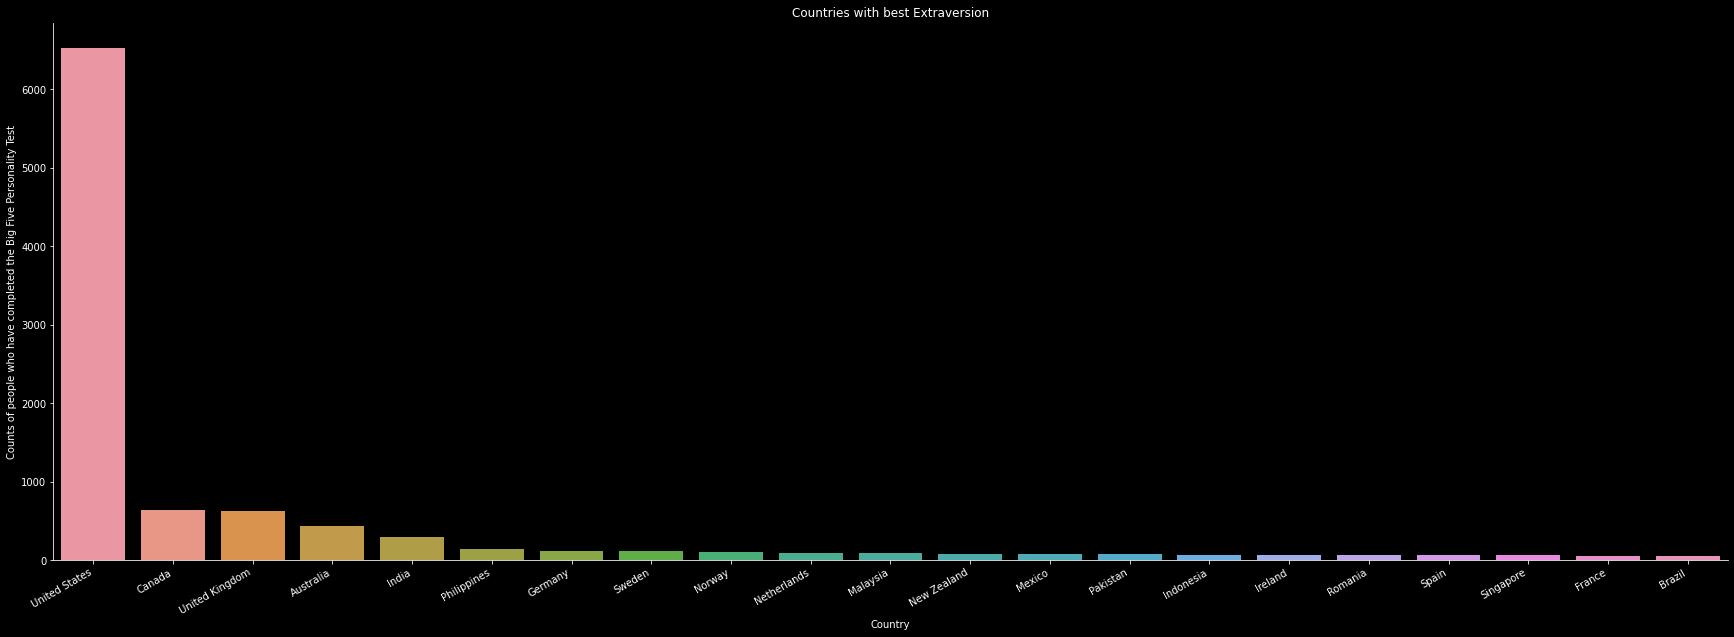

In [163]:
returnBestCountriesCountPlot( Country_with_best_Extraversion, trait_name= 'Extraversion' )

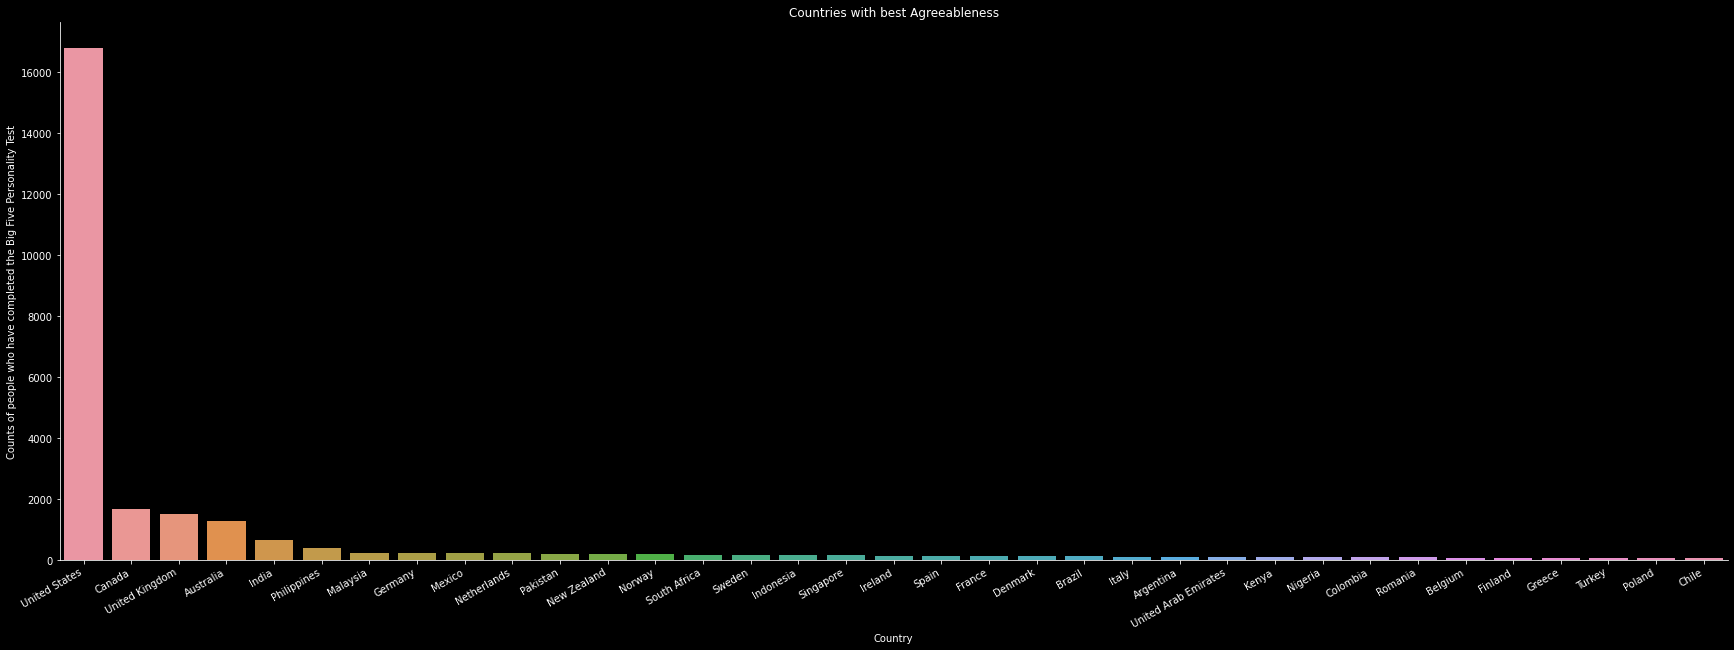

In [164]:
returnBestCountriesCountPlot( Country_with_best_Agreeableness,  trait_name= 'Agreeableness' )

## <a name='16'></a>4.5 Diagram typu radar dla wybranego wiersza


In [165]:
BigFive.head(3)

EXT1  EXT2  EXT3  ...  Conscientiousness  EmotionalStability  Openness
0   4.0   1.0   5.0  ...               22.0                26.0      35.0
1   3.0   5.0   3.0  ...               27.0                25.0      25.0
2   2.0   3.0   4.0  ...               24.0                24.0      31.0

[3 rows x 62 columns]

### <a name='17'></a>4.5.1 Przygotowanie klasy RadarChart

In [167]:
class RadarChart:

  def __init__(self, rowNo, ):
      self.rowNo    = rowNo
      self.cols     = 2
      self.rows     = 3

      self.scale_ticks_in_numbers = np.array([0, 1, 2, 3, 4, 5])  # 1=Disagree, 3=Neutral, 5=Agree
      self.factors_ticks_in_numbers = np.arange(0, 41, 5)
      self.Factors_name_list = [Factor_I_Extraversion_names_list, Factor_II_Agreeableness_names_list, Factor_III_Conscientiousness_names_list,
                                Factor_IV_EmotionalStability_names_list, Factor_V_Openness_names_list ]

      self.scale_ticks = ['No\nanswer', 'Disagree', 'slightly\ndisagree', 'Neutral', 'Slightly\nagree', 'Agree']

      self.title_list = ['Factor I - Extraversion', 'Factor II - Agreeableness', 'Factor III - Conscientiousness',
                         'Factor IV - Emotional Stability (Neuroticism)', 'Factor V - Intellect or Imagination (Openness)']  

      self.color_list = ['green', 'blue', 'yellow', 'red', 'purple']

      self.factors_list = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']


  def __CheckFlag(self, flag):
    self.scores_data = 0
    self.Factors_name_list
    if flag == 0:
      self.scores_data = BigFive.columns[:50]
      # self.questions_list = self.Factors_name_list
      self.name_list = [ quest for quest in self.Factors_name_list][self.FactorNo]
    elif flag == 1:
      self.scores_data = BigFive.columns[-5:]
      # self.questions_list = self.factors_list
      self.name_list = self.factors_list
      self.start, self.stop = ( 0, 10 )

  def __getnRowFromDataFrame(self):
    self.first_row_scores = np.array( BigFive.loc[ self.rowNo, self.scores_data ] )
    self.country_name = np.array( BigFive.loc[ self.rowNo, BigFive.columns[-6] ] )
    self.first_row_scores_with_country_name = np.append( self.first_row_scores, self.country_name )

  def __setTitleAndColor(self, flag):
    if  flag == 0:
      self.setTitle = [ title for title in self.title_list ][self.titleNo]
      self.setColor = [ color for color in self.color_list ][self.ColorNo]
    elif flag == 1:
      self.setTitle = 'Personality'
      self.setColor =  self.color_list[0]

  def __getScoresAndQuestions(self):
    self.iterator = islice(self.first_row_scores_with_country_name[:-1], self.start, self.stop )
    self.factor_scores = [scores for scores in self.iterator]
    self.factor_questions = self.name_list

  def __setQuestions_and_scores_for_chart(self):
    self.factor_questions = np.array(self.factor_questions)
    self.angles = np.linspace(0, 2*np.pi, len(self.factor_questions), endpoint=False)

    self.factor_scores = np.concatenate( [ self.factor_scores, [self.factor_scores[0]] ] )
    self.angles = np.concatenate( [ self.angles, [self.angles[0]] ] )  

  def __makePolarChart(self):
    self.ax.plot(self.angles, self.factor_scores, 'o-', linewidth=2, color= self.setColor)
    self.ax.fill(self.angles, self.factor_scores, alpha=0.3, color= self.setColor)
    self.ax.set_thetagrids(self.angles * 180/np.pi, self.factor_questions)

  def __addDescriptionToChart(self, flag):
    self.ax.set_title(self.setTitle)
    self.fig.suptitle(f'Row number: {self.rowNo} - Country: { self.first_row_scores_with_country_name[-1:] }', fontsize=25)
    self.ax.set_rlabel_position(30)
    if flag == 0:
      plt.yticks(self.scale_ticks_in_numbers, self.scale_ticks, color='grey', size=12) # map values with names
      plt.ylim(0, 5)
    elif flag == 1:
      plt.yticks(self.factors_ticks_in_numbers,  color='grey', size=12) 
      plt.ylim(0, 40)

  def create_chart(self, flag=0):
    self.FactorNo = 0
    self.titleNo  = 0
    self.ColorNo  = 0

    self. __CheckFlag(flag)
    self.__getnRowFromDataFrame()

    if flag == 0:
      self.fig= plt.figure(figsize=(28, 28) )
      self.fig.subplots_adjust(hspace=0.2, wspace=0.1)

      for self.i, self.start, self.stop in zip( range(1, 6), range(0, 50, 10), range(10, 60, 10)):
        self.ax = self.fig.add_subplot(self.rows, self.cols, self.i, polar=True)
        self.__setTitleAndColor(flag)
        self.__getScoresAndQuestions()
        self.__setQuestions_and_scores_for_chart()
        self.__makePolarChart()
        self.__addDescriptionToChart(flag)

        self.titleNo  += 1
        self.ColorNo  += 1
        self.FactorNo += 1
        
    elif flag == 1:
        self.fig= plt.figure(figsize=(10, 10) )
        self.ax = self.fig.add_subplot(1, 1, 1, polar=True)
        self.__setTitleAndColor(flag)
        self.__getScoresAndQuestions()
        self.__setQuestions_and_scores_for_chart()
        self.__makePolarChart()
        self.__addDescriptionToChart(flag)

    return plt.show()      

### <a name='18'></a>4.5.2 Przygotowanie obiektów

In [168]:
scoresRadar_row_0   = RadarChart( rowNo= 0   )
scoresRadar_row_25  = RadarChart( rowNo= 25  )
scoresRadar_row_100 = RadarChart( rowNo= 100 )

## <a name='19'></a>4.6 Prezentacja wyników dla każdej cechy osobowości dla wybranego wiersza

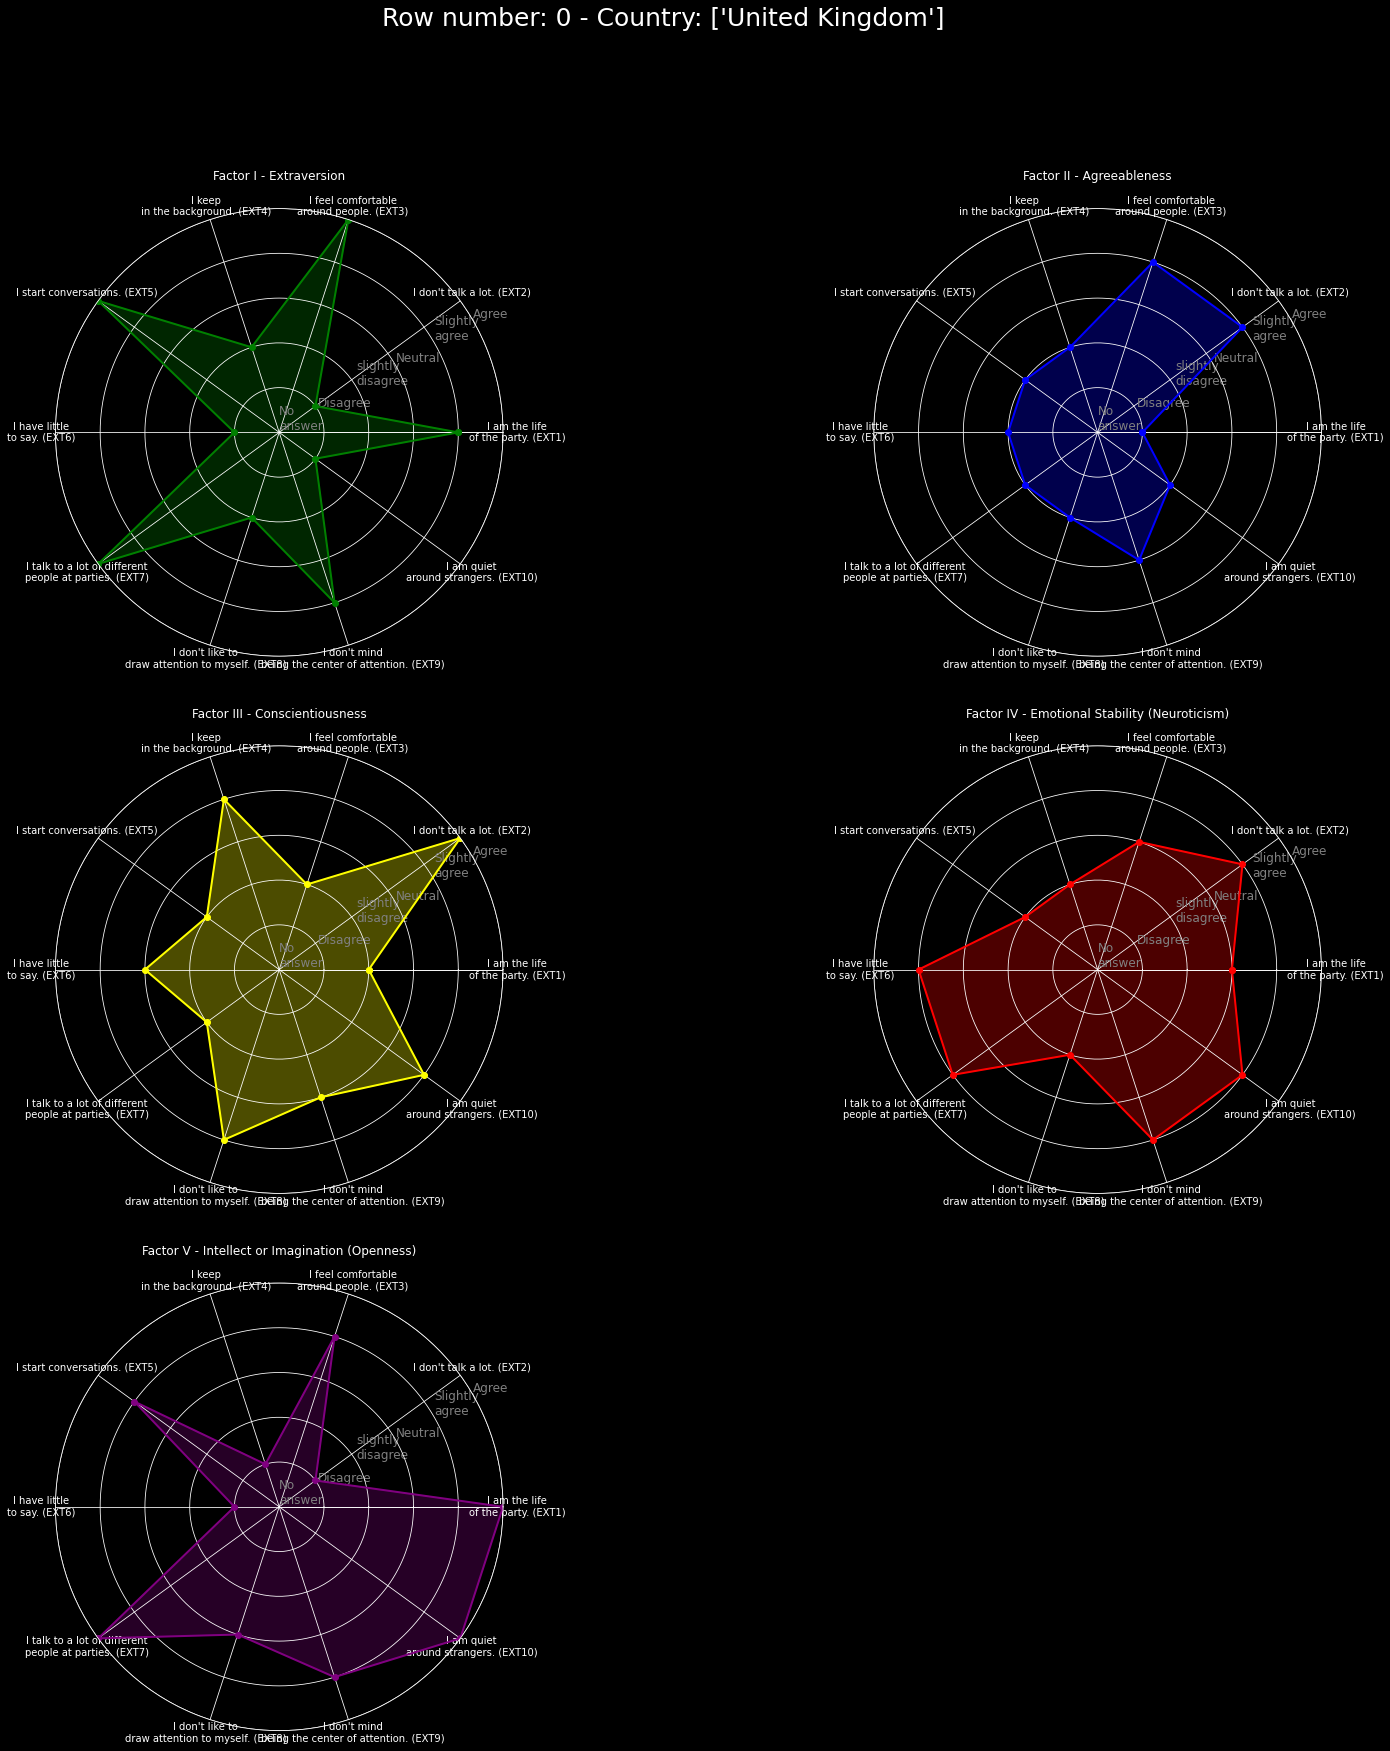

In [169]:
scoresRadar_row_0.create_chart(flag=0)

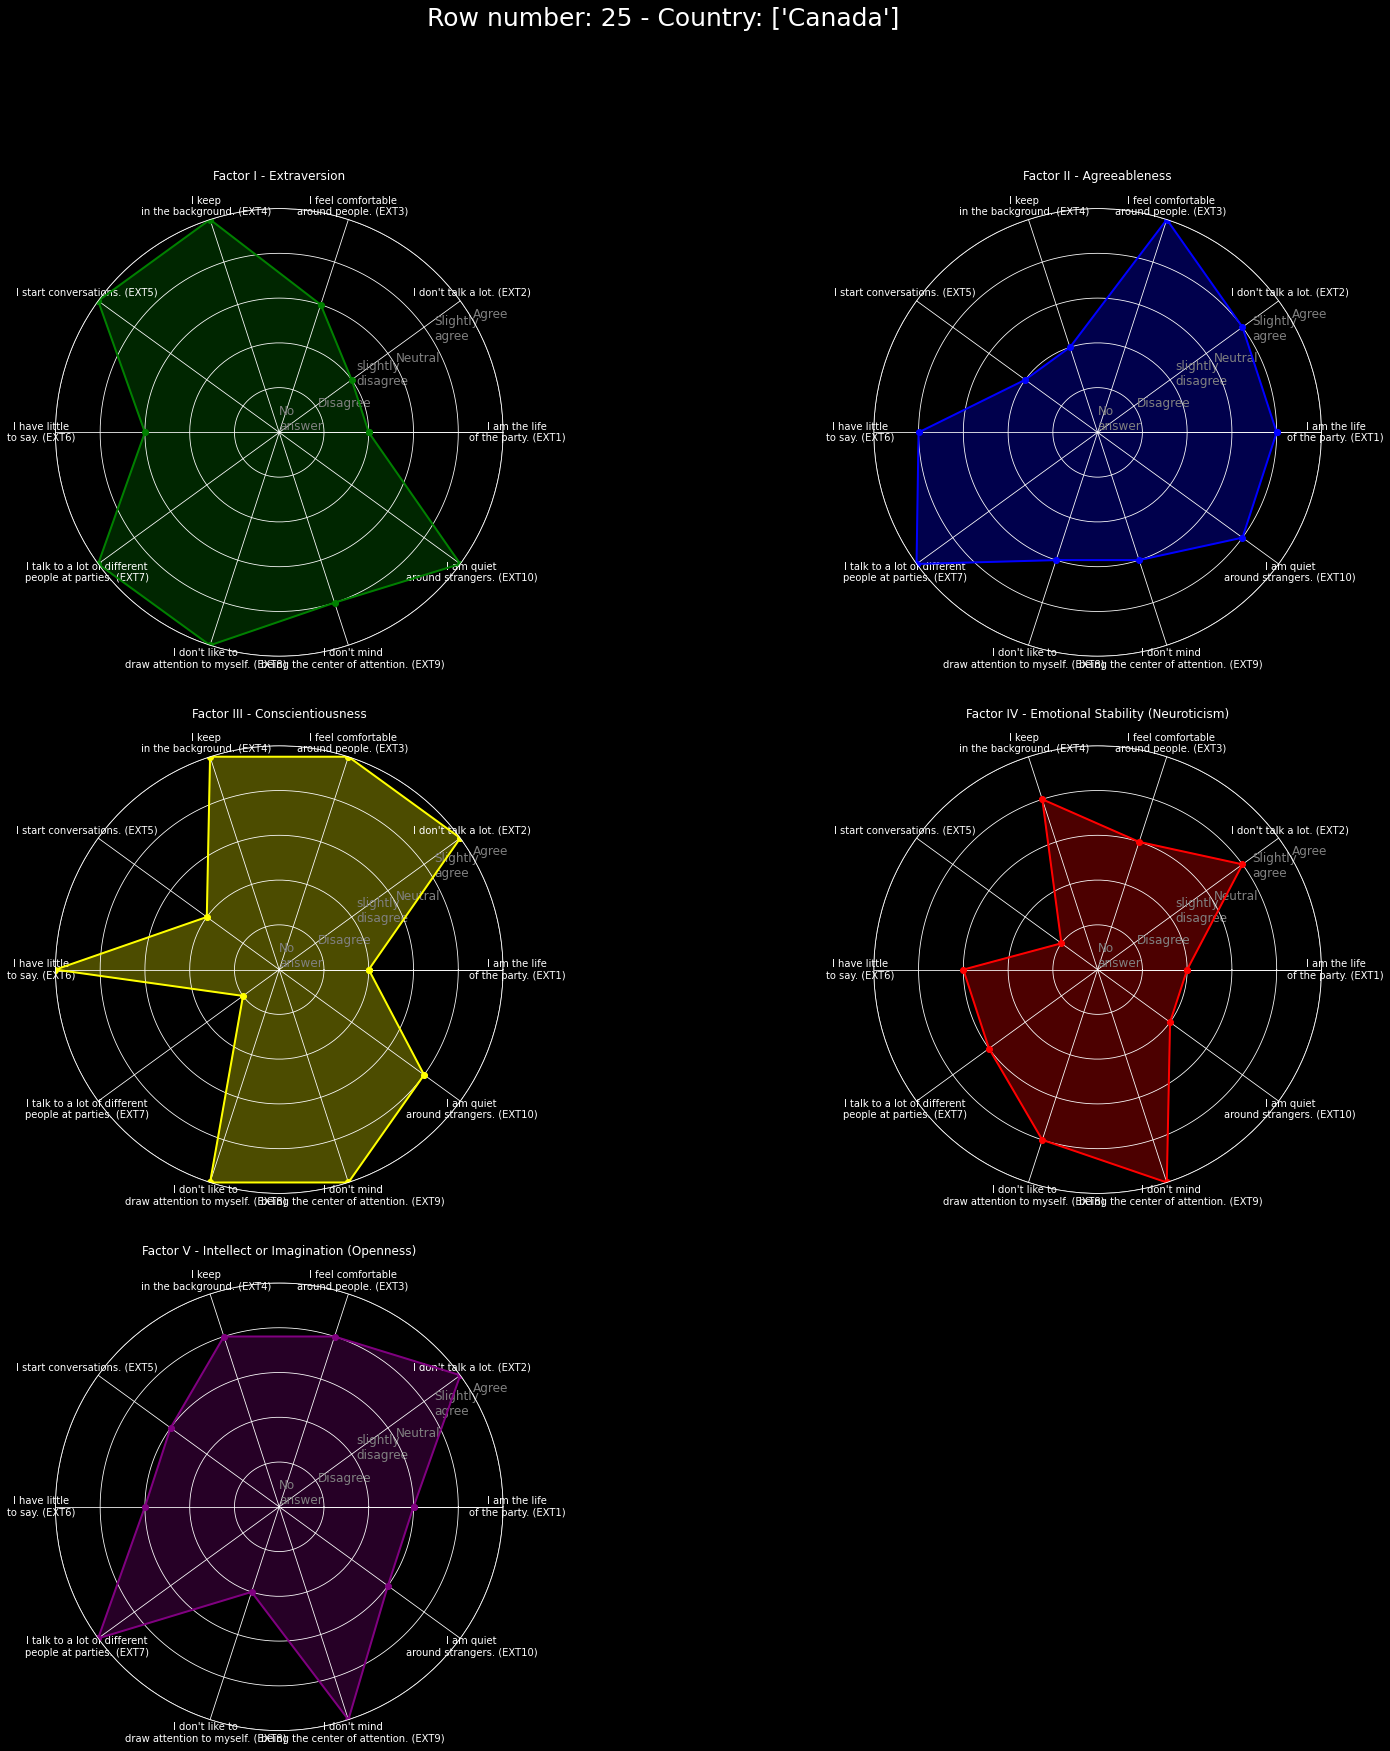

In [170]:
scoresRadar_row_25.create_chart(flag=0)

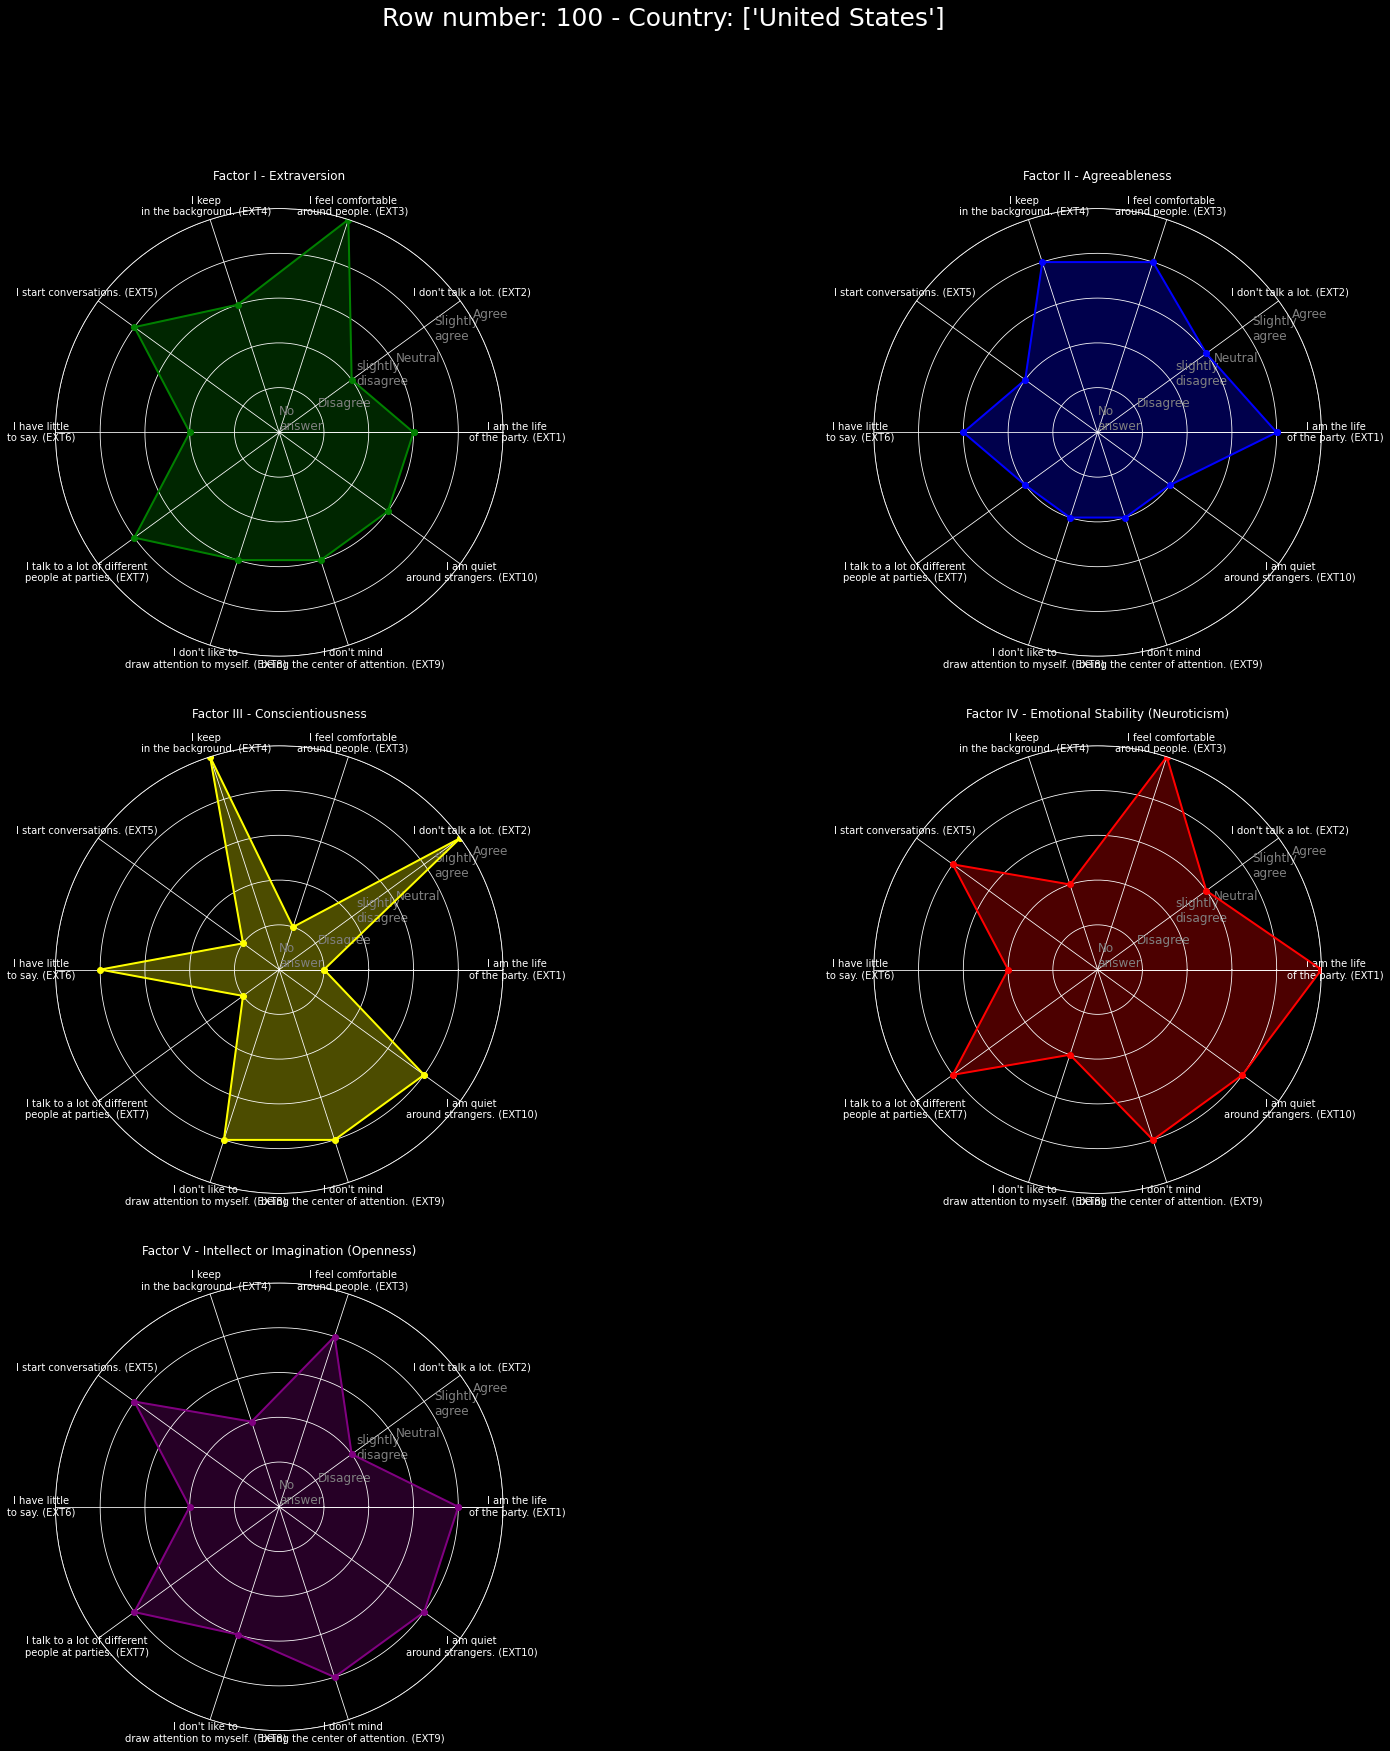

In [171]:
scoresRadar_row_100.create_chart(flag=0 )

## <a name='20'></a>4.7 Obliczanie puntków dla poszczególnych cech


Dla każdej cechy można zdobyć maksylanie 40 punktów.

Wzory:

1. E = 20 + (1) ___ - (6)  ___  +(11) ___ - (16) ___ +(21) ___ - (26) ___ +(31) ___ - (36) ___ +(41) ___ - (46) ___     = _____ 


2. A = 14 - (2) ___ + (7)  ___  -(12) ___ +(17) ___ -(22) ___ +(27) ___ -(32) ___ +(37) ___ +(42) ___ +(47) ___    = _____


3. C = 14 + (3) ___ - (8)  ___  +(13) ___ - (18) ___ +(23) ___ - (28) ___ +(33) ___ - (38) ___ +(43) ___ +(48) ___    = _____ 


4. N = 38 - (4) ___ + (9)  ___  -(14) ___ +(19) ___ -(24) ___ - (29) ___ -(34) ___ - (39) ___ -(44) ___ - (49) ___       = _____ 


5. O = 8 + (5) ___ - (10)  ___ +(15) ___ - (20) ___ +(25) ___ - (30) ___ +(35) ___ +(40) ___ +(45) ___ +(50) ___  = _____ 


Gdzie:

*  E - Extraversion,
*  A - Agreeableness,
*  C - Conscientiousness,
*  N - Emotional Stability,
*  O - Intellect or Imagination (Openness)

(numer pytania)

źródło: https://openpsychometrics.org/printable/big-five-personality-test.pdf


Zatem, po podstawieniu do wzorów oznaczeń występujących w data frame otrzymamy:


1. **E** = 20 + **EXT1** - **EXT2** + **EXT3** - **EXT4** + **EXT5** - **EXT6** + **EXT7** - **EXT8** + **EXT9** - **EXT10** = 

2. **A** = 14 - **AGR1** + **AGR2** - **AGR3** + **AGR4** - **AGR5** + **AGR6** - **AGR7** + **AGR8** + **AGR9** + **AGR10** = 

3. **C** = 14 + **CSN1** - **CSN2**  + **CSN3** - **CSN4** + **CSN5** - **CSN6** + **CSN7** - **CSN8** + **CSN9** + **CSN10** = 


4. **N** = 38 - **EST1** + **EST2** - **EST3** + **EST4** - **EST5** - **EST6** - **EST7** - **EST8** - **EST9** - **EST10** = 


5. **O** = 8 + **OPN1** - **OPN2** + **OPN3** - **OPN4** + **OPN5** - **OPN6** + **OPN7** + **OPN8** + **OPN9** + **OPN10** = 


### <a name='21'></a>4.7.1 Przygotowanie dodatkowych kolumn

In [172]:
# Przygotowanie dodatkowych kolumn
BigFive[ ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness'] ] = 0    
BigFive.head(2)

EXT1  EXT2  EXT3  ...  Conscientiousness  EmotionalStability  Openness
0   4.0   1.0   5.0  ...                  0                   0         0
1   3.0   5.0   3.0  ...                  0                   0         0

[2 rows x 62 columns]

In [173]:
BigFive.columns[:-13]

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9'],
      dtype='object')

In [174]:
BigFive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693694 entries, 0 to 1015340
Data columns (total 62 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   EXT1                   693694 non-null  float64       
 1   EXT2                   693694 non-null  float64       
 2   EXT3                   693694 non-null  float64       
 3   EXT4                   693694 non-null  float64       
 4   EXT5                   693694 non-null  float64       
 5   EXT6                   693694 non-null  float64       
 6   EXT7                   693694 non-null  float64       
 7   EXT8                   693694 non-null  float64       
 8   EXT9                   693694 non-null  float64       
 9   EXT10                  693694 non-null  float64       
 10  EST1                   693694 non-null  float64       
 11  EST2                   693694 non-null  float64       
 12  EST3                   693694 non-null  flo

### <a name='22'></a>4.7.2 Wprowadzenie obliczonych wyników do data frame

In [175]:
def getExtraversionScore(df):
  ExtraversionScore = 0
  ExtraversionScore = 20 + df['EXT1'] - df['EXT2'] + df['EXT3'] - df['EXT4'] + df['EXT5'] - df['EXT6'] + df['EXT7'] - df['EXT8'] + df['EXT9'] - df['EXT10']
  return ExtraversionScore

def getAgreeablenessScore(df):
  AgreeablenessScore = 0
  AgreeablenessScore = 14 - df['AGR1'] + df['AGR2'] - df['AGR3'] + df['AGR4'] - df['AGR5'] + df['AGR6'] - df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10']
  return AgreeablenessScore

def getConscientiousnessScore(df):
  ConscientiousnessScore = 0
  ConscientiousnessScore = 14 + df['CSN1'] - df['CSN2'] + df['CSN3'] - df['CSN4'] + df['CSN5'] - df['CSN6'] + df['CSN7'] - df['CSN8'] + df['CSN9'] + df['CSN10']
  return ConscientiousnessScore

def getEmotionalStabilityScore(df):
  EmotionalStabilityScore = 0
  EmotionalStabilityScore = 38 - df['EST1'] + df['EST2'] - df['EST3'] + df['EST4'] - df['EST5'] - df['EST6'] - df['EST7'] - df['EST8'] - df['EST9'] - df['EST10']
  return EmotionalStabilityScore

def getOpennessScore(df):
  OpennessScore = 0
  OpennessScore = 8 + df['OPN1'] - df['OPN2'] + df['OPN3'] - df['OPN4'] + df['OPN5'] - df['OPN6'] + df['OPN7'] + df['OPN8'] + df['OPN9'] + df['OPN10'] 
  return OpennessScore


BigFive['Extraversion']       = BigFive.apply( getExtraversionScore,        axis=1 ) 
BigFive['Agreeableness']      = BigFive.apply( getAgreeablenessScore,       axis=1 ) 
BigFive['Conscientiousness']  = BigFive.apply( getConscientiousnessScore,   axis=1 ) 
BigFive['EmotionalStability'] = BigFive.apply( getEmotionalStabilityScore,  axis=1 ) 
BigFive['Openness']           = BigFive.apply( getOpennessScore,            axis=1 ) 

In [176]:
BigFive.head()

EXT1  EXT2  EXT3  ...  Conscientiousness  EmotionalStability  Openness
0   4.0   1.0   5.0  ...               22.0                26.0      35.0
1   3.0   5.0   3.0  ...               27.0                25.0      25.0
2   2.0   3.0   4.0  ...               24.0                24.0      31.0
3   2.0   2.0   2.0  ...               15.0                21.0      29.0
5   3.0   3.0   4.0  ...               27.0                28.0      34.0

[5 rows x 62 columns]

## <a name='23'></a>4.8 Podsumowanie osobowości dla wybranego wiersza na diagramie typu radar

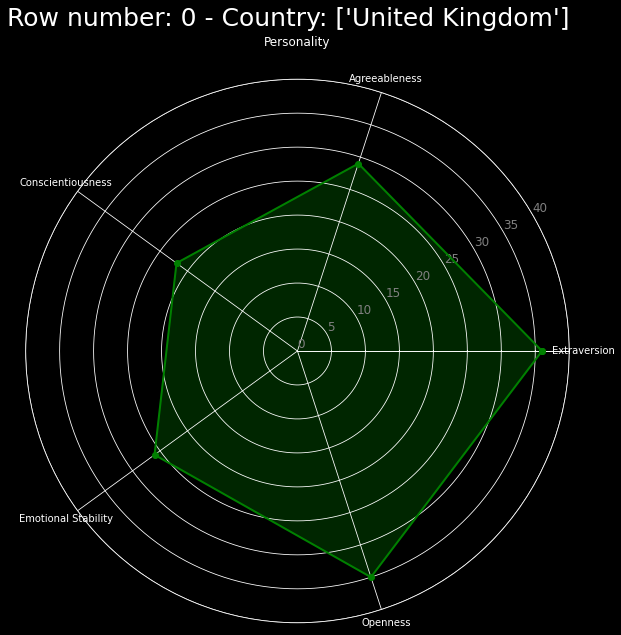

In [177]:
scoresRadar_row_0.create_chart(flag=1 )

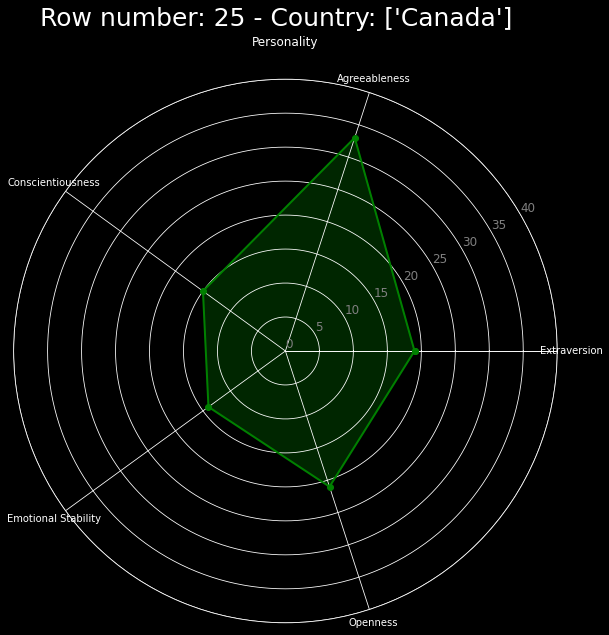

In [178]:
scoresRadar_row_25.create_chart(flag=1 )

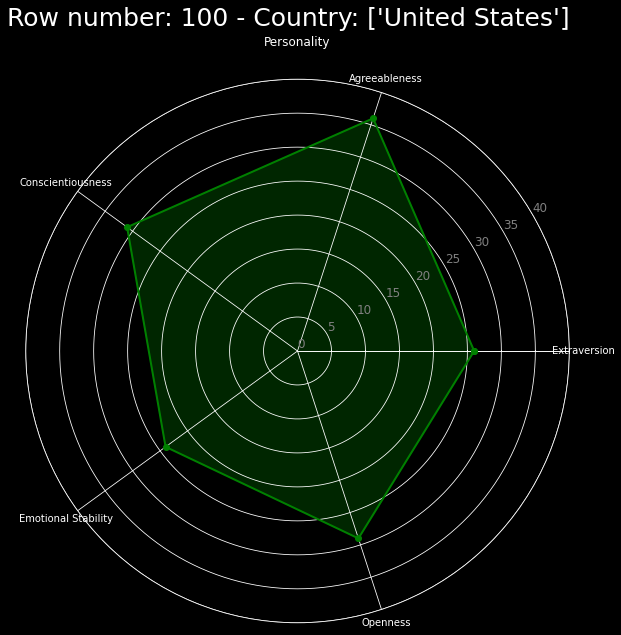

In [179]:
scoresRadar_row_100.create_chart(flag=1)

# Analiza danych dla Polski

## <a name='24'></a>4.9 Prezentacja przybliżonych lokalizacji na wykresie scatterplot

In [181]:
pol_data = countries_groups.get_group('Poland')

pol_data.head(3)

EXT1  EXT2  EXT3  ...  Conscientiousness  EmotionalStability  Openness
222   1.0   5.0   2.0  ...               18.0                21.0      34.0
325   2.0   5.0   3.0  ...               11.0                13.0       9.0
376   2.0   3.0   2.0  ...               22.0                17.0      33.0

[3 rows x 62 columns]

In [182]:
pol_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4189 entries, 222 to 1015293
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EXT1                   4189 non-null   float64       
 1   EXT2                   4189 non-null   float64       
 2   EXT3                   4189 non-null   float64       
 3   EXT4                   4189 non-null   float64       
 4   EXT5                   4189 non-null   float64       
 5   EXT6                   4189 non-null   float64       
 6   EXT7                   4189 non-null   float64       
 7   EXT8                   4189 non-null   float64       
 8   EXT9                   4189 non-null   float64       
 9   EXT10                  4189 non-null   float64       
 10  EST1                   4189 non-null   float64       
 11  EST2                   4189 non-null   float64       
 12  EST3                   4189 non-null   float64       
 13

In [183]:
%pol_data['long_appx_lots_of_err'] = pol_data['long_appx_lots_of_err'].astype('float')
pol_data['lat_appx_lots_of_err'] = pol_data['lat_appx_lots_of_err'].astype('float')

In [185]:
def get_city_name(df):

  cityOrVillage = None
  
  coordinates = ( df['lat_appx_lots_of_err'], df['long_appx_lots_of_err'] )
  location = geolocator.reverse( coordinates )


  places_list = ['city', 'town', 'village', 'hamlet', 'county']

  for place in places_list:
    if place in location.raw['address'].keys():
      cityOrVillage = place
  
  df['state'] = location.raw['address']['state'].split()[1]
  df['place'] = location.raw['address'][cityOrVillage]

  return  df

%%time
pol_data = pol_data.apply( get_city_name, axis=1 ) 

KeyboardInterrupt: ignored

In [82]:
pol_data.head()

EXT1  EXT2  EXT3  ...  Openness          state               place
222   1.0   5.0   2.0  ...      34.0        łódzkie  powiat pajęczański
325   2.0   5.0   3.0  ...       9.0  wielkopolskie              Poznań
376   2.0   3.0   2.0  ...      33.0    mazowieckie            Warszawa
601   4.0   1.0   5.0  ...      28.0    mazowieckie            Warszawa
626   4.0   2.0   5.0  ...      28.0    mazowieckie            Warszawa

[5 rows x 65 columns]

In [83]:
places_groups = pol_data.groupby(by='place')
states_groups = pol_data.groupby(by='state')


print(f'places_groups: {len(places_groups)}, states_groups: {len(states_groups)}')

places_groups: 244, states_groups: 16


In [84]:
places_groups_counts = places_groups.size().to_frame('count')
places_groups_counts.reset_index(inplace=True)
places_groups_counts.sort_values('count', ascending=False).head()

state_groups_counts = states_groups.size().to_frame('count')
state_groups_counts.reset_index(inplace=True)
state_groups_counts.sort_values('count', ascending=False).head()

state  count
4          mazowieckie   2887
1   kujawsko-pomorskie    262
14             śląskie    184
5          małopolskie    142
0         dolnośląskie    129

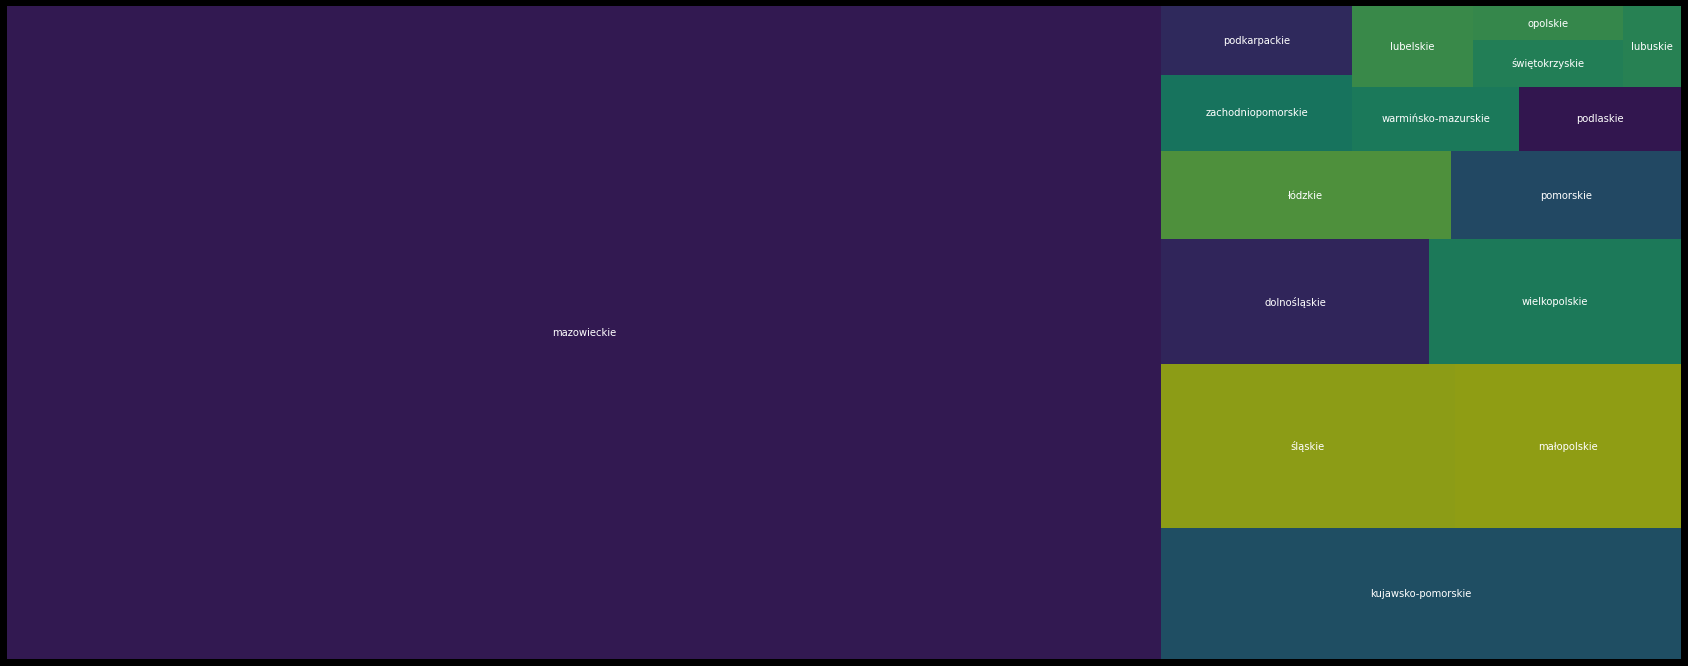

In [85]:
state_groups_counts_descending = state_groups_counts.sort_values('count', ascending=False)

plt.figure(figsize=(30, 12) )

squarify.plot(
              sizes= state_groups_counts_descending['count'],
              label= state_groups_counts_descending['state'][:16],
              alpha=.7 )
plt.axis('off')
plt.show()

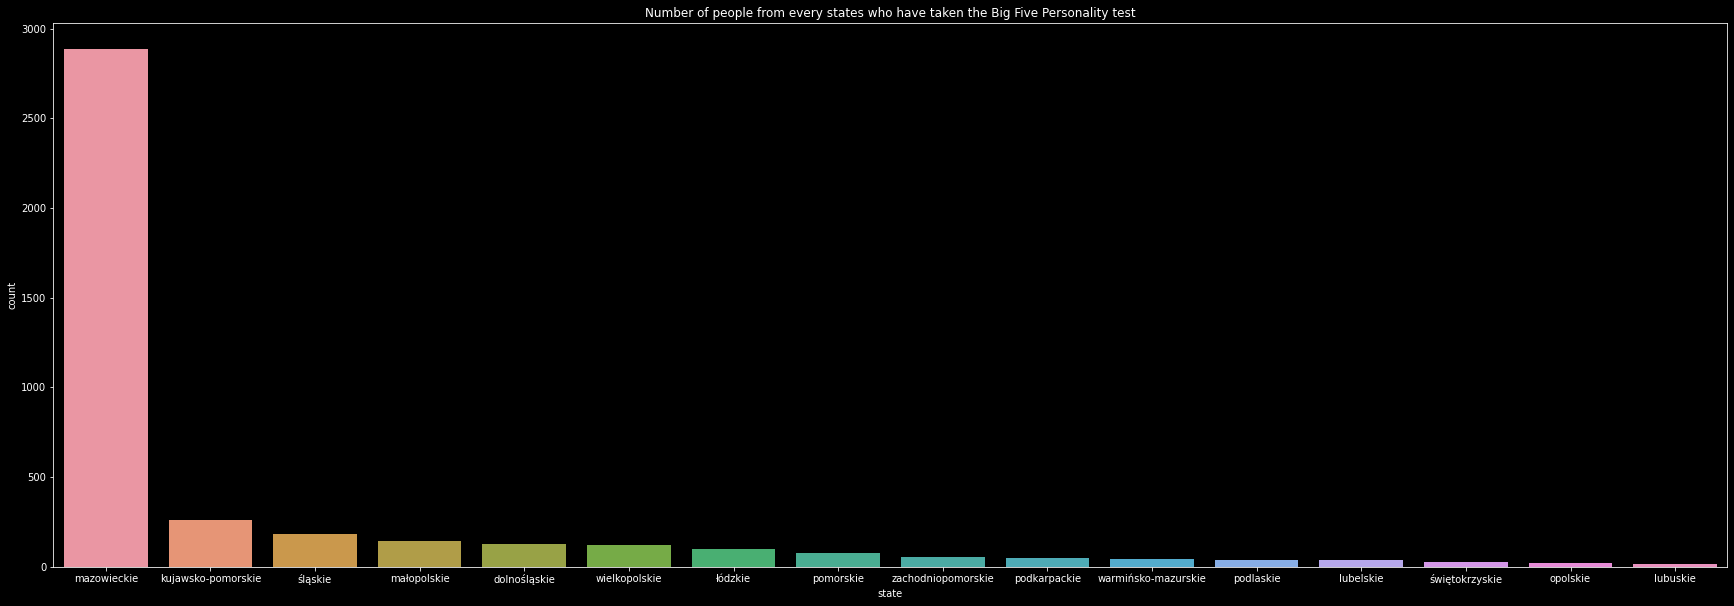

In [123]:
plt.figure(figsize=(30,10))


g = sns.barplot(x='state', y='count', data= state_groups_counts_descending )
g.set(title='Number of people from every voivoidship who have taken the Big Five Personality test')

plt.show()

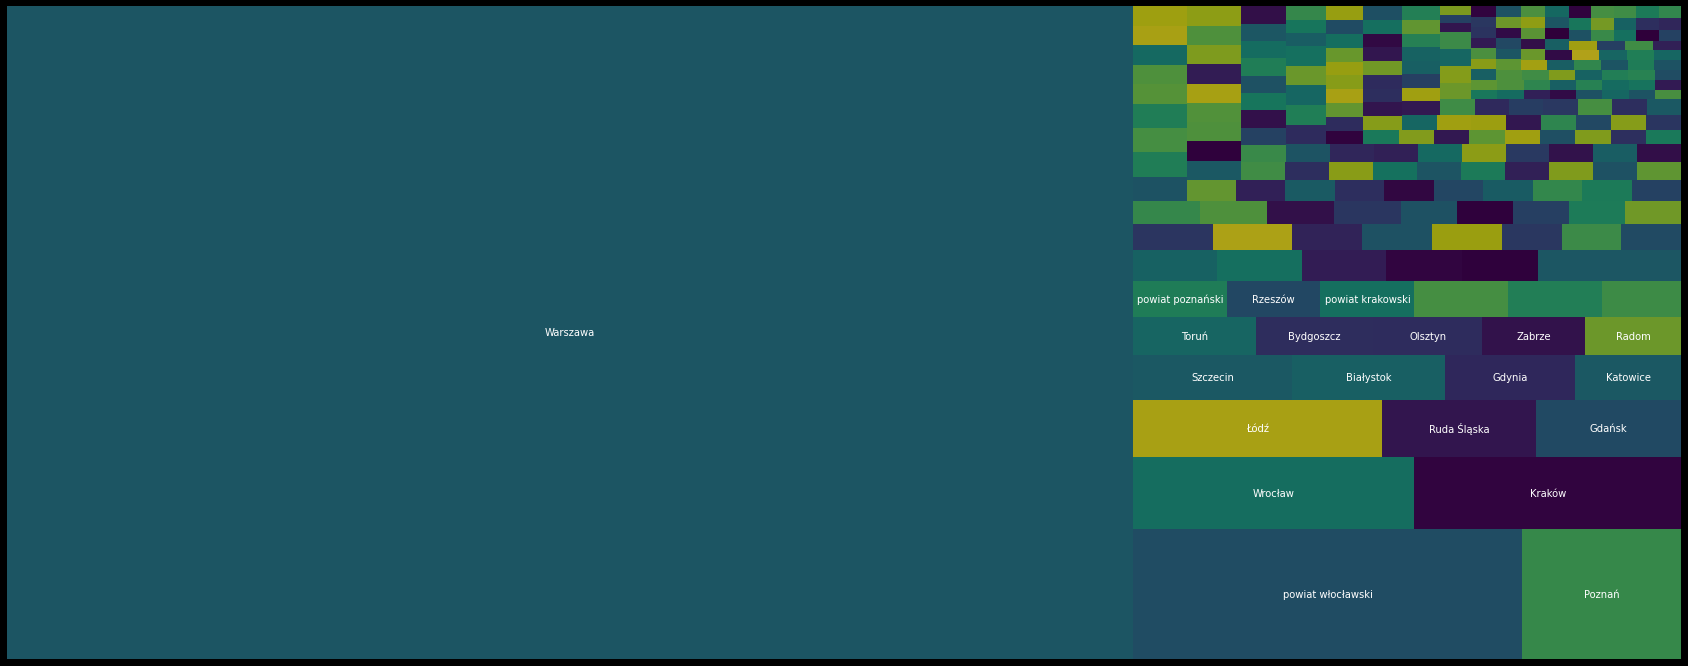

In [86]:
places_groups_counts_descending = places_groups_counts.sort_values('count', ascending=False)

plt.figure(figsize=(30, 12) )

squarify.plot(
              sizes= places_groups_counts_descending['count'],
              label= places_groups_counts_descending['place'][:20],
              alpha=.7 )
plt.axis('off')
plt.show()

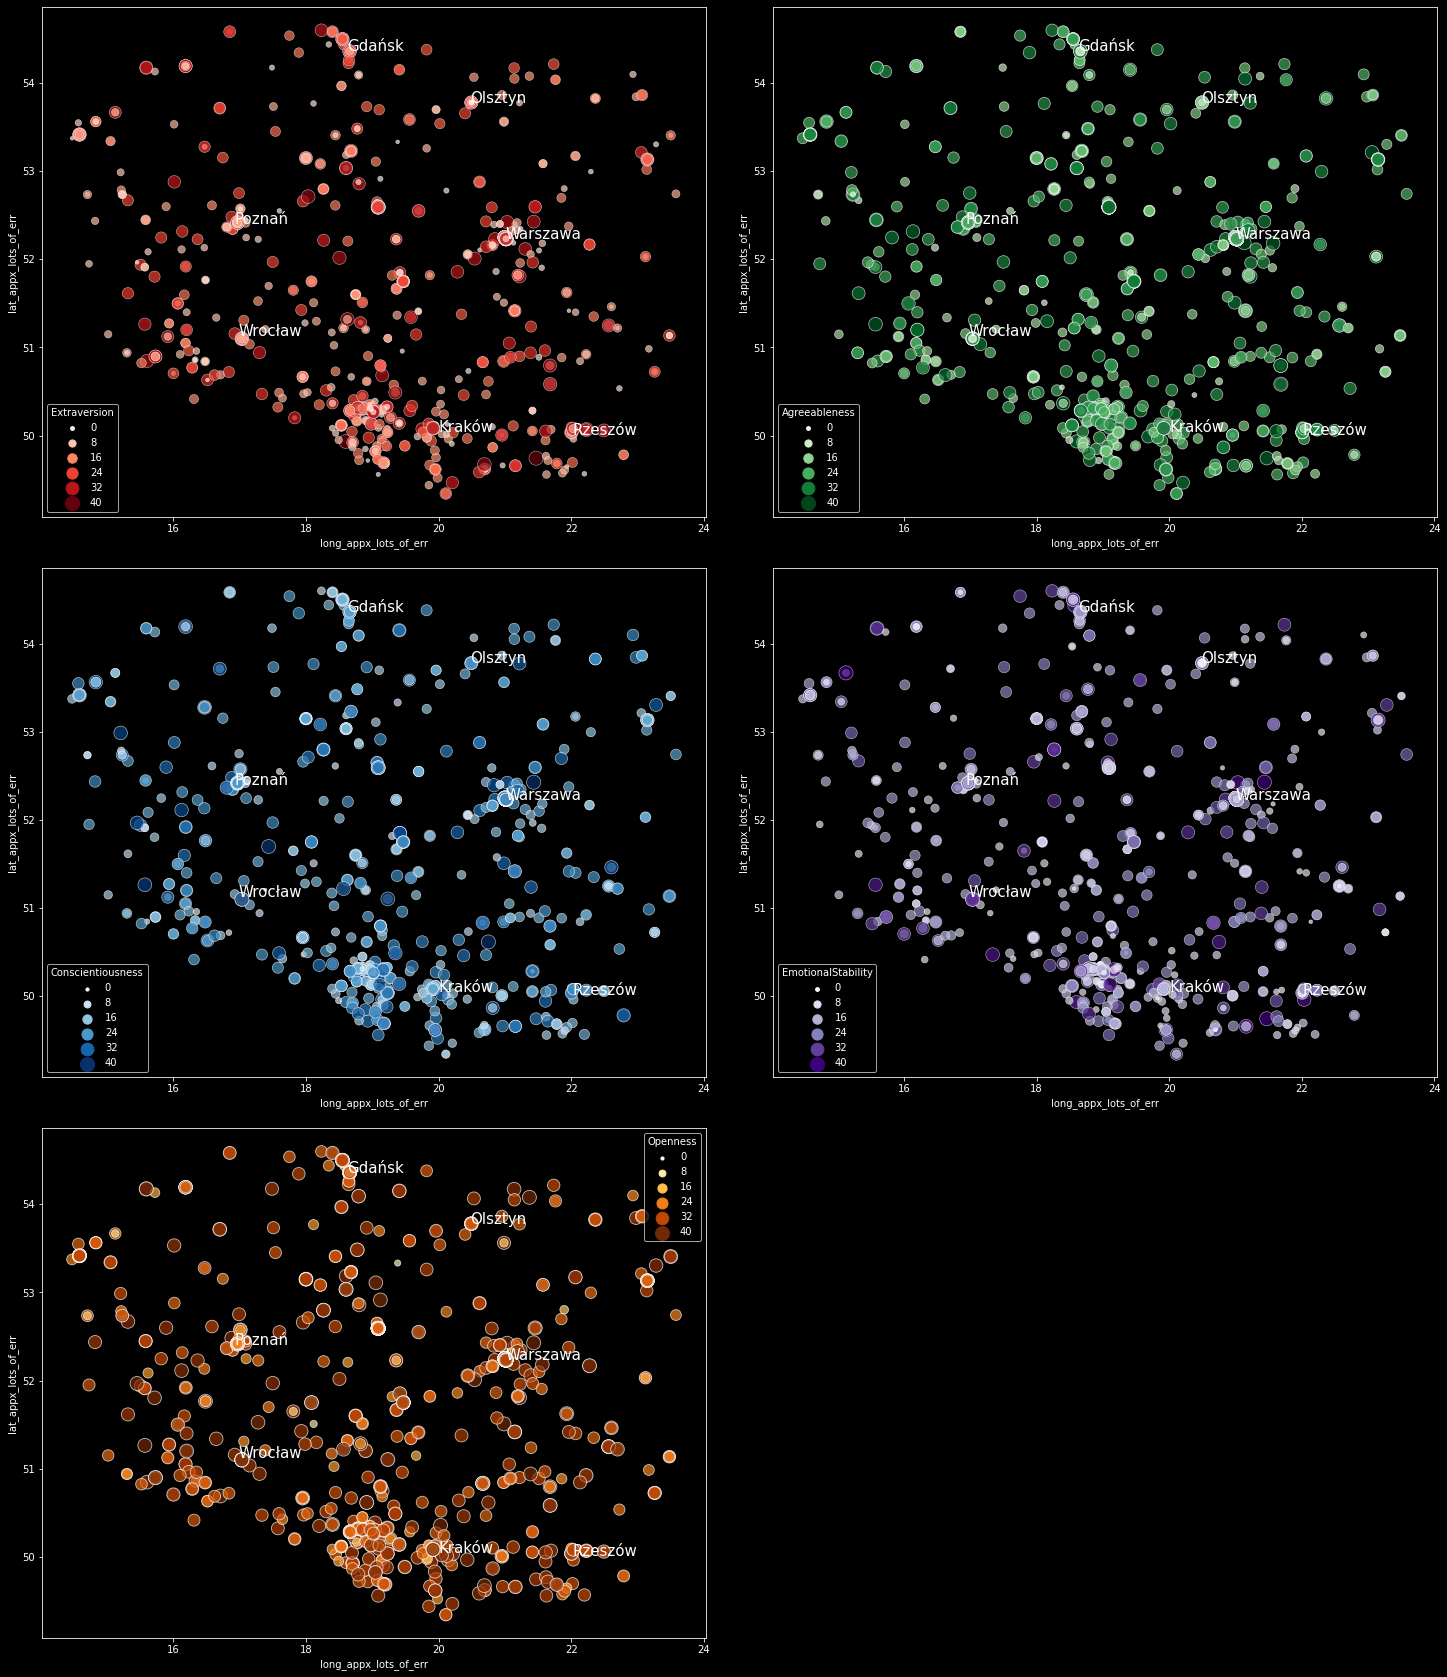

In [103]:
cols = 2
rows = 3
personality_list = pol_data.columns[-7:-2]
color_list = ['Reds', 'Greens', 'Blues', 'Purples', 'YlOrBr']
cities_list =['Olsztyn', 'Gdańsk', 'Warszawa', 'Kraków', 'Wrocław', 'Rzeszów', 'Poznań']
index = 0


fig = plt.figure(figsize=(25, 30))
fig.subplots_adjust(hspace=0.1, wspace=0.1 )

for i in range(1, 6):   
  fig.add_subplot(rows, cols, i)

  p1 = sns.scatterplot(x='long_appx_lots_of_err', y='lat_appx_lots_of_err',  hue= personality_list[index], size= personality_list[index], data=pol_data, palette= color_list[index],
              sizes=(10,200), alpha=0.7  )
  
  for i, city in enumerate(cities_list):
    loc = geolocator.geocode(city)
    city_coordinates = (loc.longitude, loc.latitude )
    plt.annotate(city, xy= city_coordinates, xycoords='data', fontsize=15)


  index +=1

plt.show()

In [88]:
personality_scores = pol_data.columns[-8:]

pol_personality_scores = pol_data[personality_scores]

pol_personality_scores.head()

country  Extraversion  ...          state               place
222  Poland           2.0  ...        łódzkie  powiat pajęczański
325  Poland          10.0  ...  wielkopolskie              Poznań
376  Poland          10.0  ...    mazowieckie            Warszawa
601  Poland          32.0  ...    mazowieckie            Warszawa
626  Poland          29.0  ...    mazowieckie            Warszawa

[5 rows x 8 columns]

In [89]:
pol_personality_scores.describe().T

count       mean       std  min   25%   50%   75%   max
Extraversion        4189.0  17.033660  9.341835 -1.0  10.0  16.0  24.0  40.0
Agreeableness       4189.0  23.841490  7.734842 -1.0  19.0  24.0  30.0  40.0
Conscientiousness   4189.0  20.909525  7.404900  0.0  16.0  21.0  26.0  40.0
EmotionalStability  4189.0  17.297684  8.814573 -1.0  11.0  17.0  23.0  40.0
Openness            4189.0  30.747195  6.178097  0.0  27.0  31.0  35.0  41.0

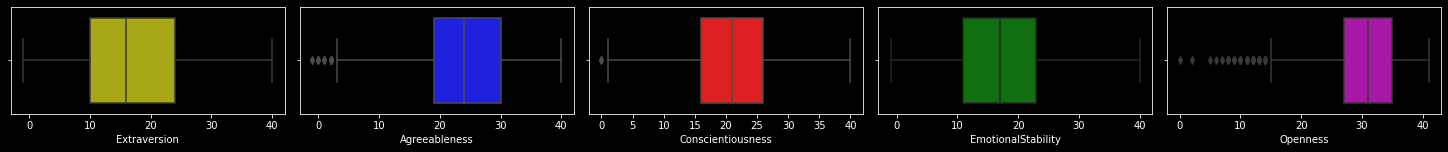

In [90]:
cols = ['Extraversion', 'Agreeableness', 	'Conscientiousness', 'EmotionalStability', 'Openness']
colors = ['y', 'b', 'r', 'g', 'm']


fig, ax = plt.subplots(1, 5, figsize=(20,2), constrained_layout=True)
for i, col in enumerate(cols):
  sns.boxplot(  x=col, data=pol_personality_scores, ax=ax[i], color=colors[i])

plt.show()

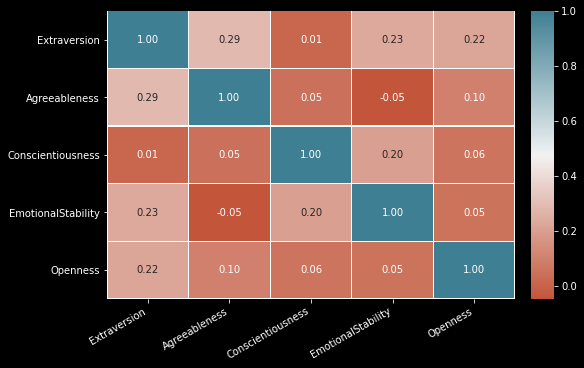

In [91]:
# Czy jest jakiś związek pomiędzy cechami osobowości ?
# H0:   brak zależności
# H1:   jest zależność
# test: correlation test
# fig, ax = plt.subplots(1, 1, figsize=(10,10), constrained_layout=True)

pol_personality_corr = pol_personality_scores.corr()

fig, ax = plt.subplots(1, 1, figsize=(8,5), constrained_layout=True)
set_cbar=True
g = sns.heatmap(pol_personality_corr, cbar=set_cbar, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
plt.show()

In [92]:
pol_personality_combinations_list =list(combinations(cols, r=2))
pol_personality_combinations_list

[('Extraversion', 'Agreeableness'),
 ('Extraversion', 'Conscientiousness'),
 ('Extraversion', 'EmotionalStability'),
 ('Extraversion', 'Openness'),
 ('Agreeableness', 'Conscientiousness'),
 ('Agreeableness', 'EmotionalStability'),
 ('Agreeableness', 'Openness'),
 ('Conscientiousness', 'EmotionalStability'),
 ('Conscientiousness', 'Openness'),
 ('EmotionalStability', 'Openness')]

In [93]:
from scipy import stats



pol_personality_pearsonr_df = pd.DataFrame() # Przygotowanie data frame
pol_personality_combinations_list =list(combinations(cols, r=2))

for i, combination in enumerate(pol_personality_combinations_list):
  trait_1 = combination[0]
  trait_2 = combination[1]

  r, p_value = stats.pearsonr(x= np.array(pol_personality_scores[ trait_1 ]), y=np.array(pol_personality_scores[ trait_2 ]) )

  col_dict = {
              'trait_1'              : trait_1,
              'trait_2'              : trait_2,
              'Pearson’s_corr_coeff' : np.round(r, 3),
              'p_value'              : np.round(p_value, 3)
              }

  pol_personality_pearsonr_df = pol_personality_pearsonr_df.append(pd.DataFrame(col_dict, index=[0]))

pol_personality_pearsonr_df.reset_index(drop=True, inplace=True)

In [94]:
pol_personality_pearsonr_df

trait_1             trait_2  Pearson’s_corr_coeff  p_value
0        Extraversion       Agreeableness                 0.288    0.000
1        Extraversion   Conscientiousness                 0.011    0.492
2        Extraversion  EmotionalStability                 0.232    0.000
3        Extraversion            Openness                 0.221    0.000
4       Agreeableness   Conscientiousness                 0.048    0.002
5       Agreeableness  EmotionalStability                -0.048    0.002
6       Agreeableness            Openness                 0.099    0.000
7   Conscientiousness  EmotionalStability                 0.199    0.000
8   Conscientiousness            Openness                 0.056    0.000
9  EmotionalStability            Openness                 0.054    0.000

In [95]:
pol_personality_scores.columns[3:]

Index(['Conscientiousness', 'EmotionalStability', 'Openness', 'state',
       'place'],
      dtype='object')

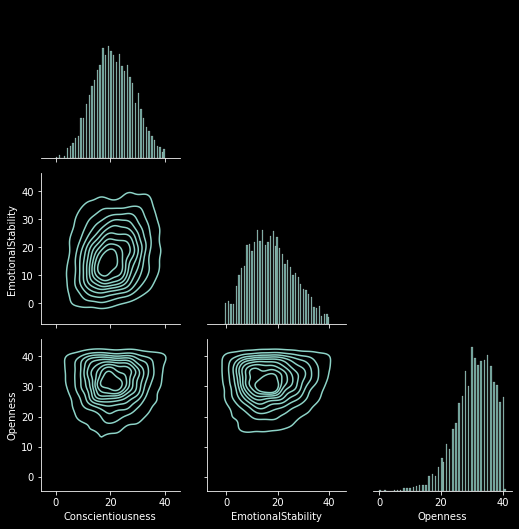

In [96]:
g = sns.PairGrid(pol_personality_scores[ pol_personality_scores.columns[3:] ], corner=True)

g.map_diag(sns.histplot, bins=80)
g.map_offdiag(sns.kdeplot)
plt.show()

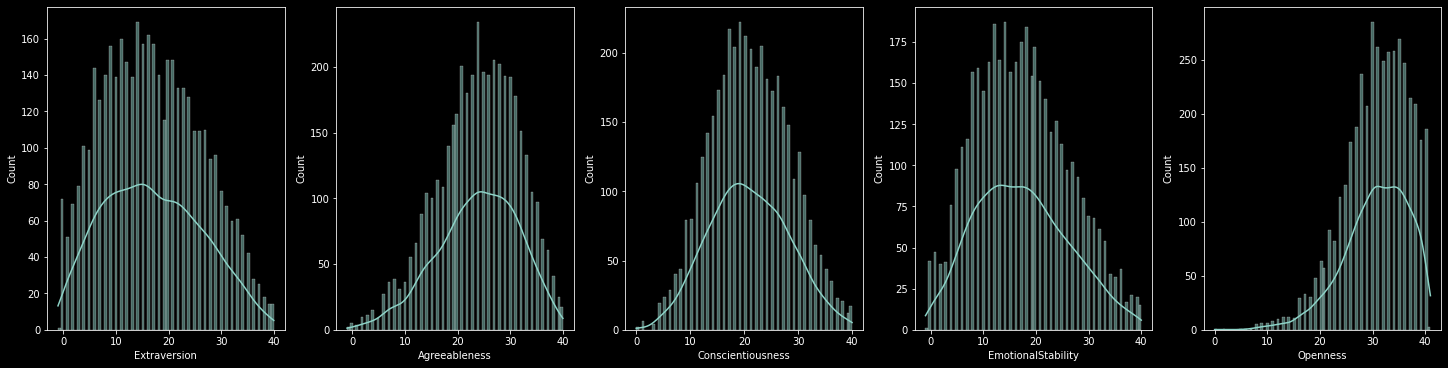

In [97]:
fig, ax = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)

for i, col in enumerate(cols):

  sns.histplot(data=pol_personality_scores, x =col, ax=ax[i], kde=True, bins=80 )

plt.show()

In [98]:
# np 5 krajów o najwyższym poziomie: 

    # EXT - Extraversion,
    # EST - Neuroticism,
    # AGR - Agreeableness (Zgodność),
    # CSN - Conscientiousness (sumienność),
    # OPN - Openness


# PCA ?
# ANOVA, t-test, Chi squared, correlation trelplot is a figure-level function and does not accept the ax= paramterest ?
# Linear regression ?
# logistic regression ?
# RADAR CHART ??
# Może sprawdzić zależność osobowości od lokalizacji?